In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [9]:
numerical_feature =[feature for feature in df.columns if df[feature].dtypes !='O']
discrete_feature =[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature =[feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature =[feature for feature in df.columns if feature not in numerical_feature]

print('Numerical Features Count{}'.format(len(numerical_feature)))
print('Discrete Features Count{}'.format(len(discrete_feature)))
print('Continuous Features Count{}'.format(len(continuous_feature)))
print('Categorical Features Count{}'.format(len(categorical_feature)))

Numerical Features Count16
Discrete Features Count2
Continuous Features Count14
Categorical Features Count7


In [10]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [11]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [12]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [13]:
randomsampleimputation(df,"Cloud9am")
randomsampleimputation(df,"Cloud3pm")
randomsampleimputation(df,"Evaporation")
randomsampleimputation(df,"Sunshine")

In [14]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


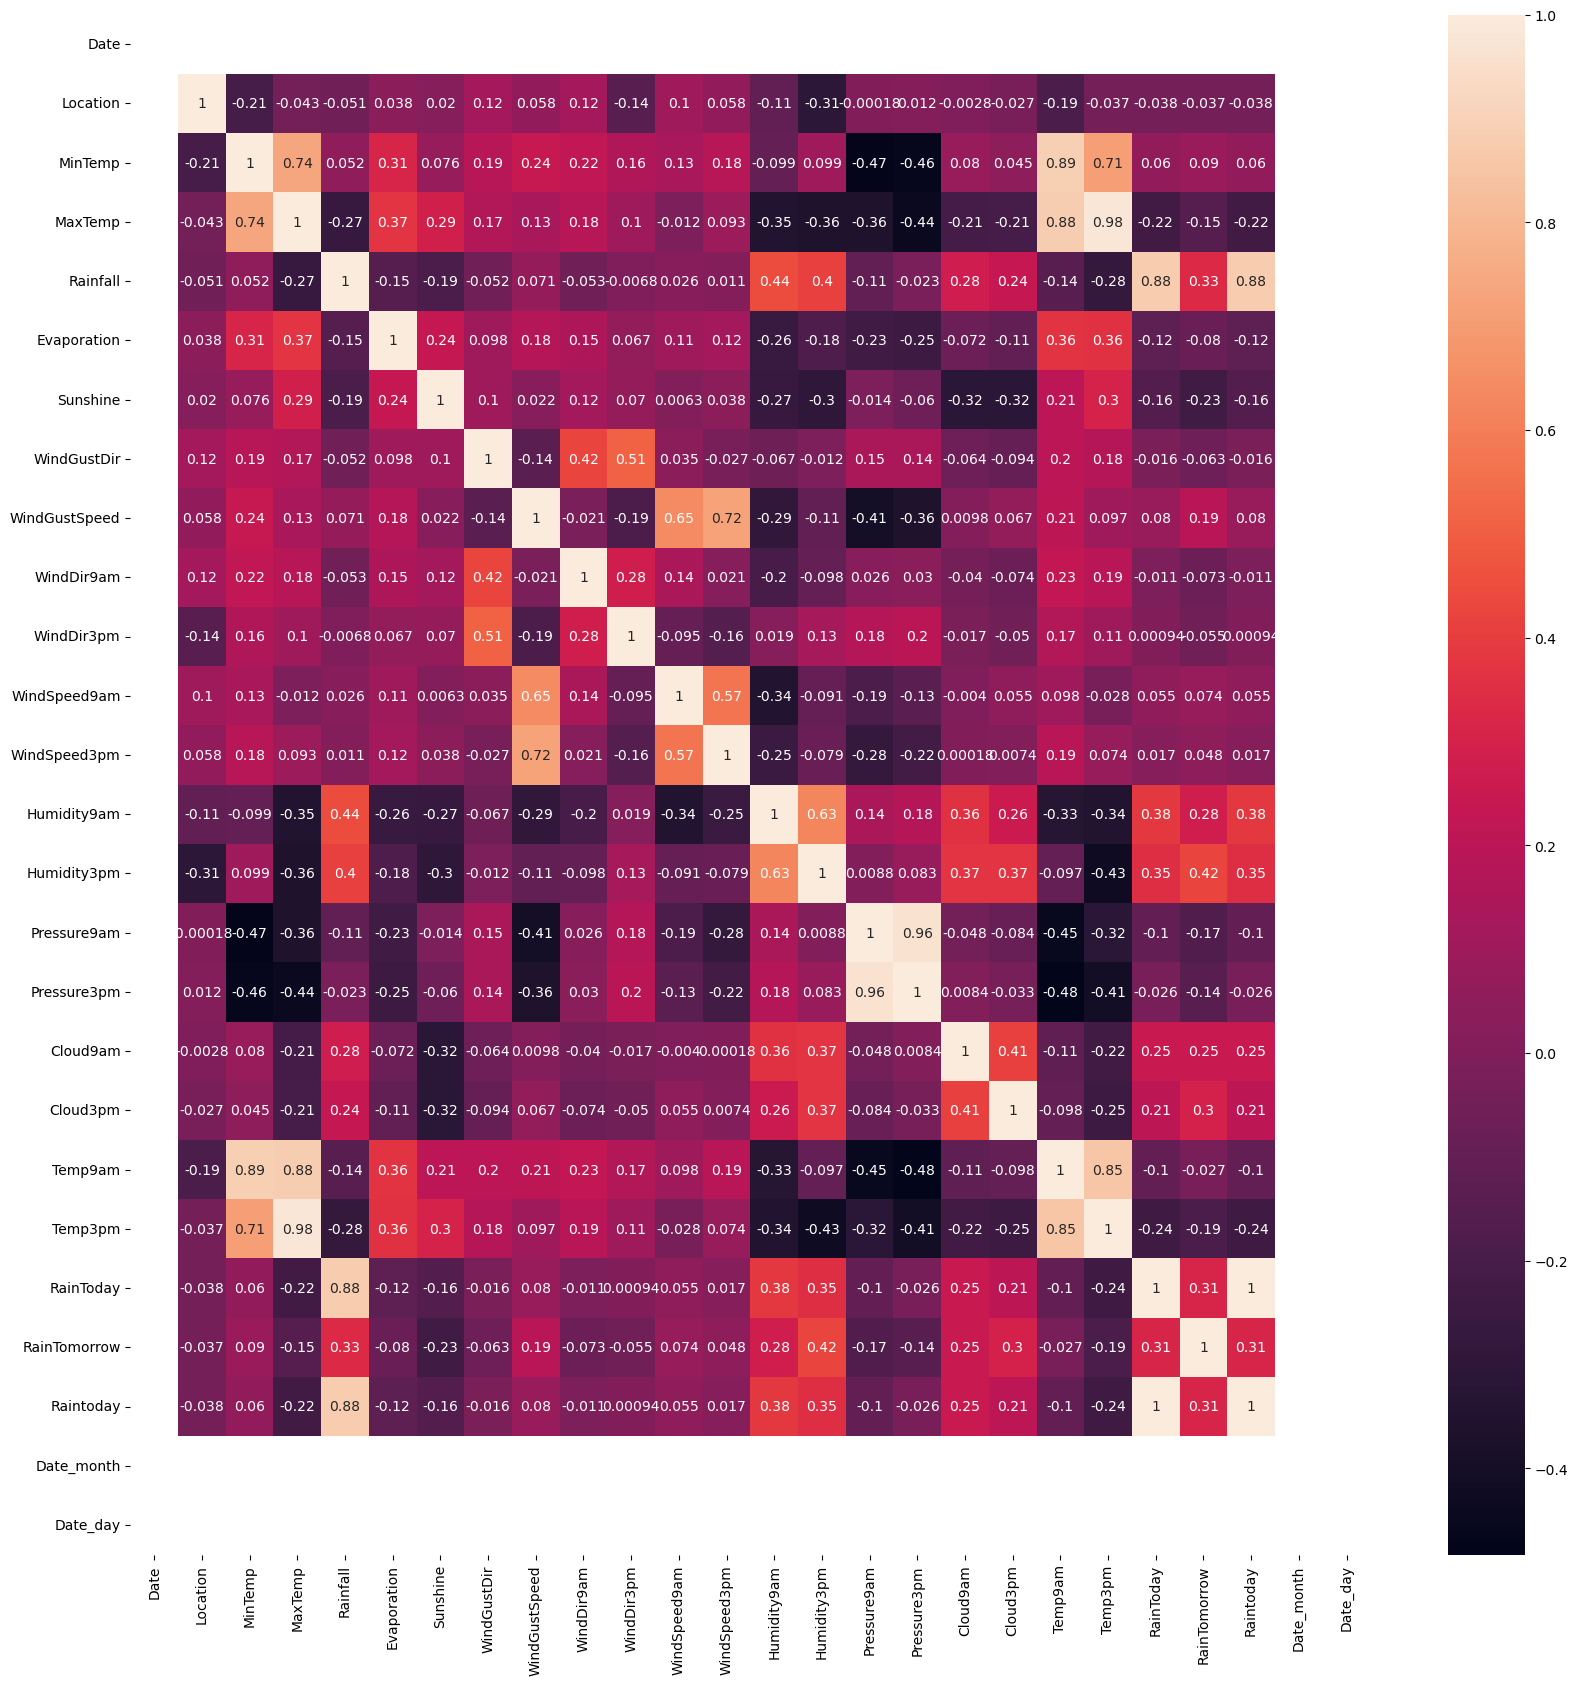

In [149]:
corrmat = df.corr(method= 'spearman')
plt.figure(figsize=(20,20))

g = sns.heatmap(corrmat, annot=True)

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

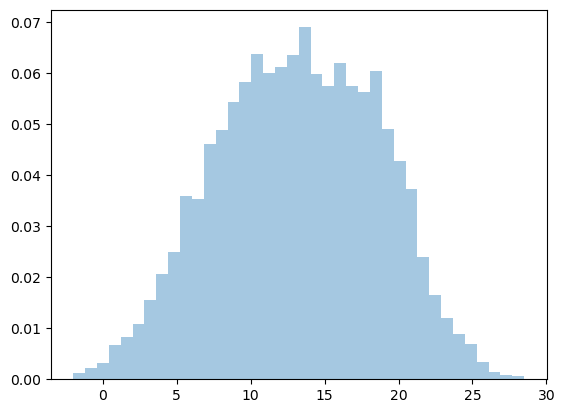

In [17]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

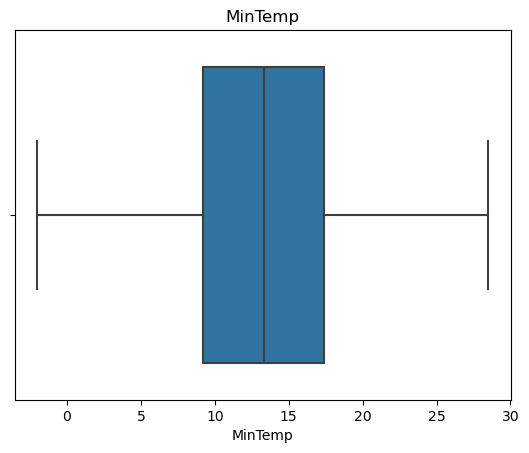

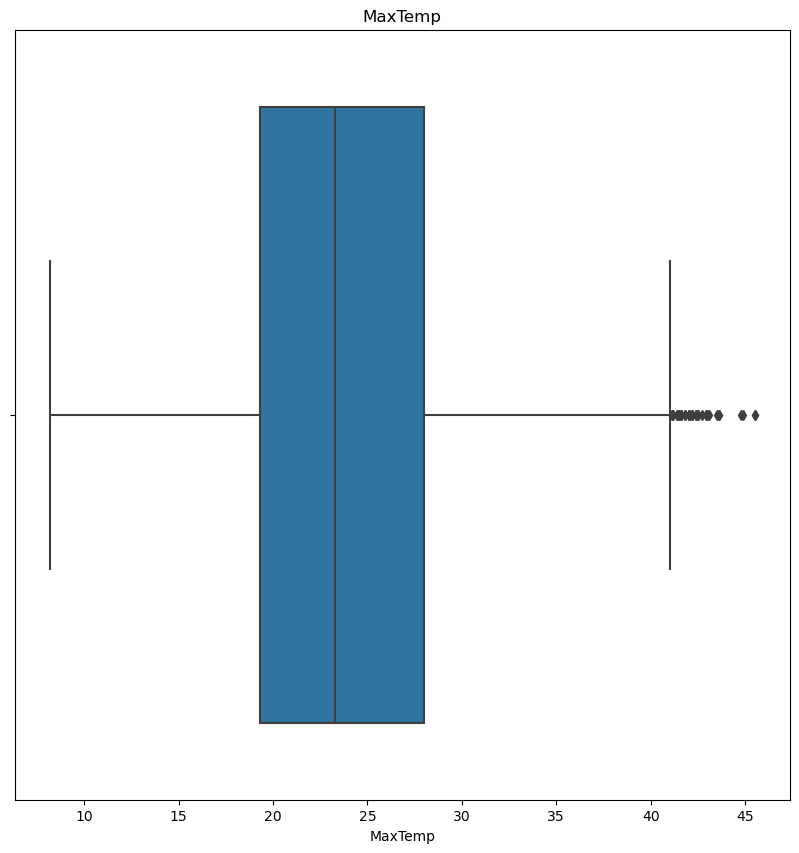

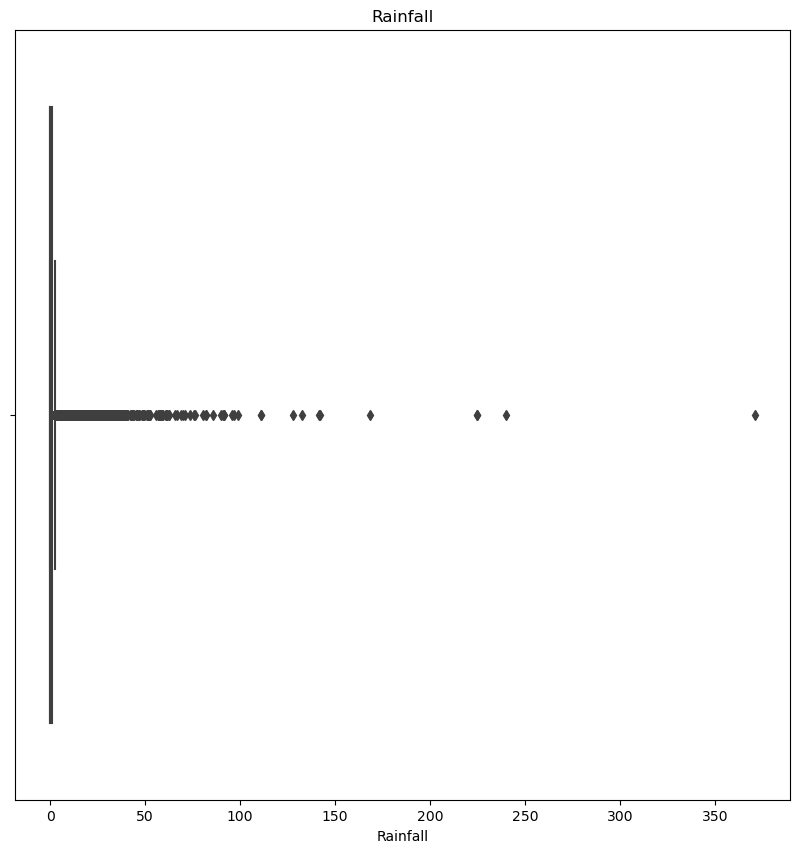

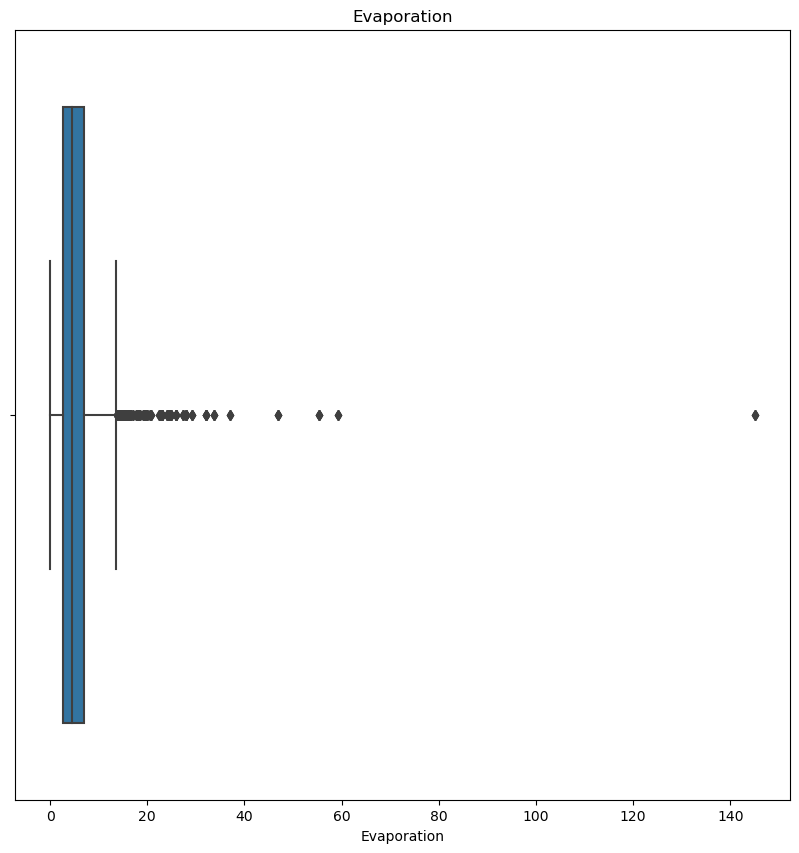

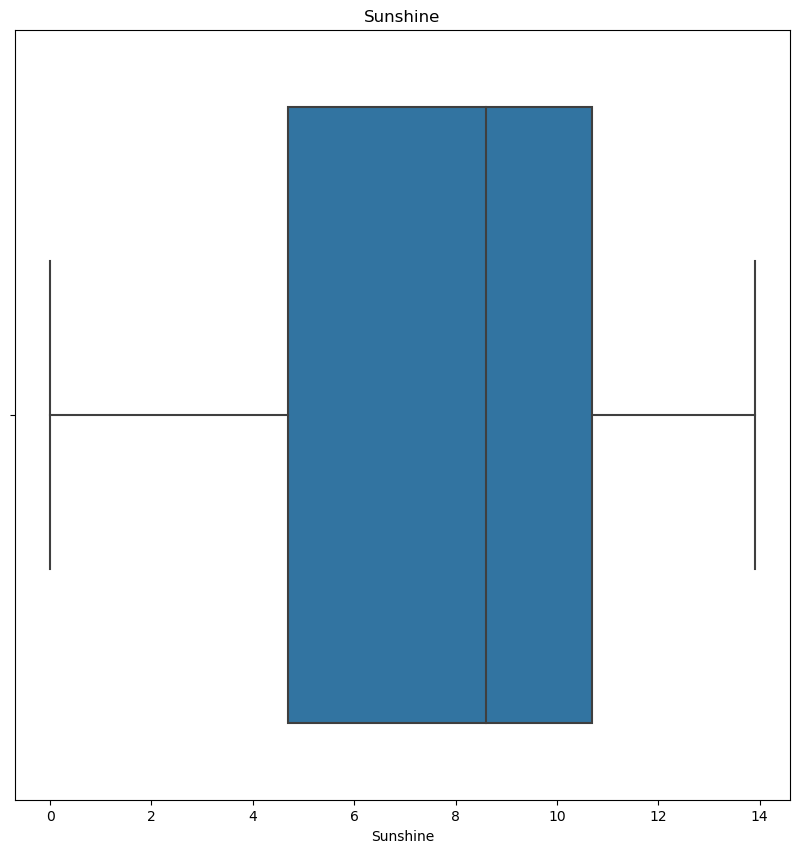

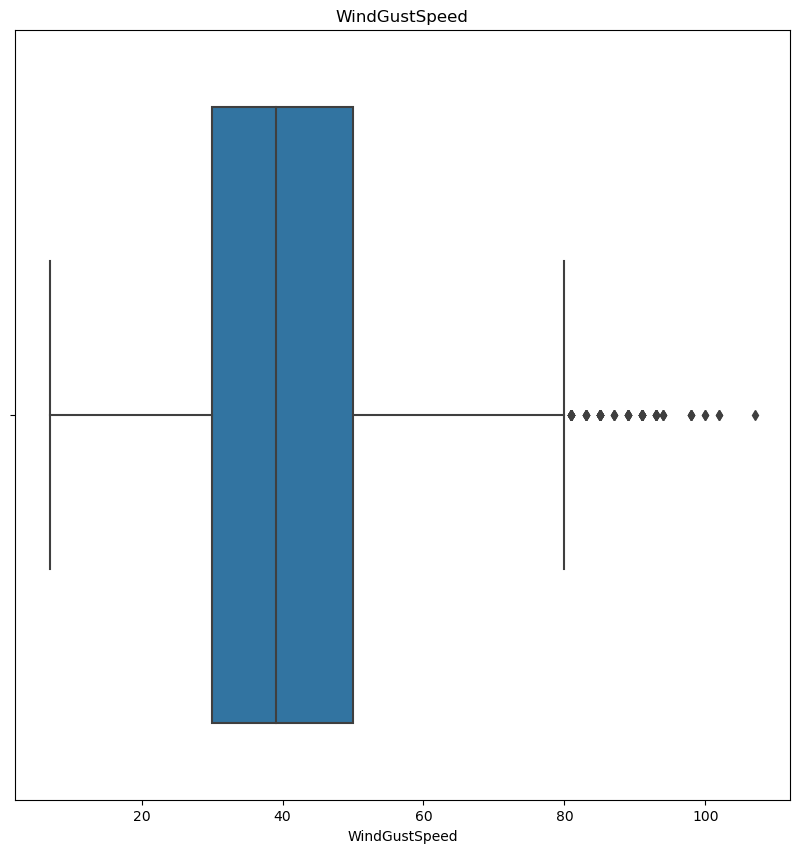

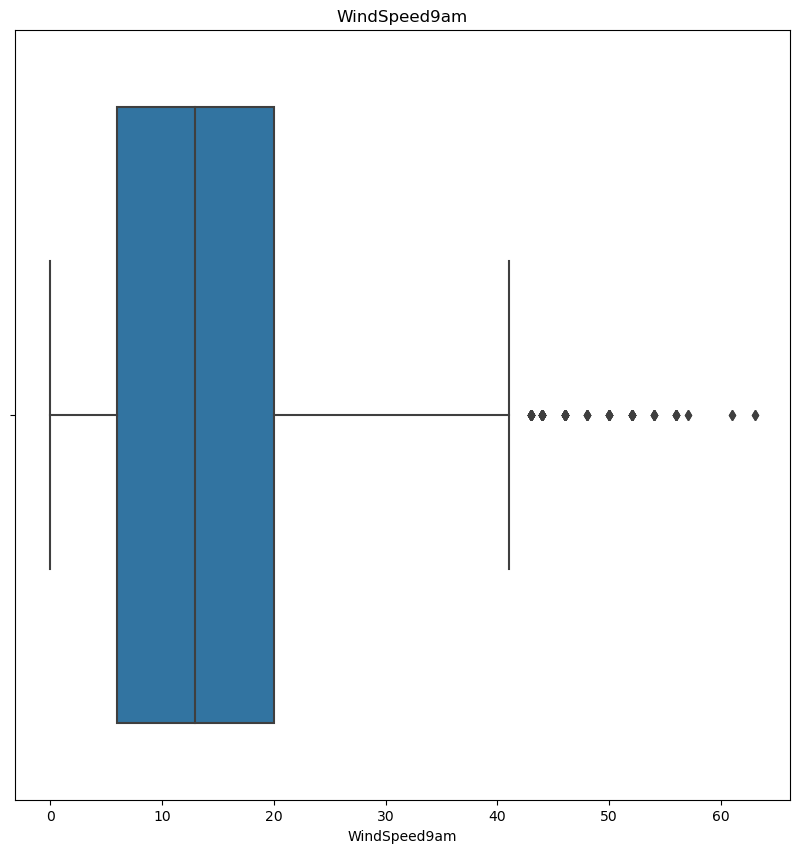

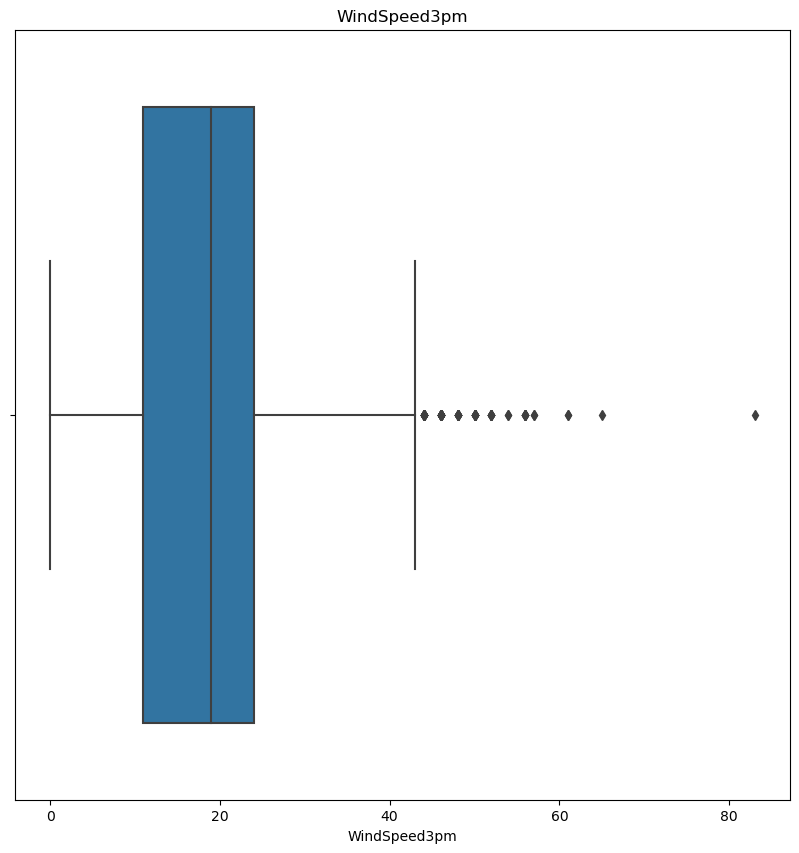

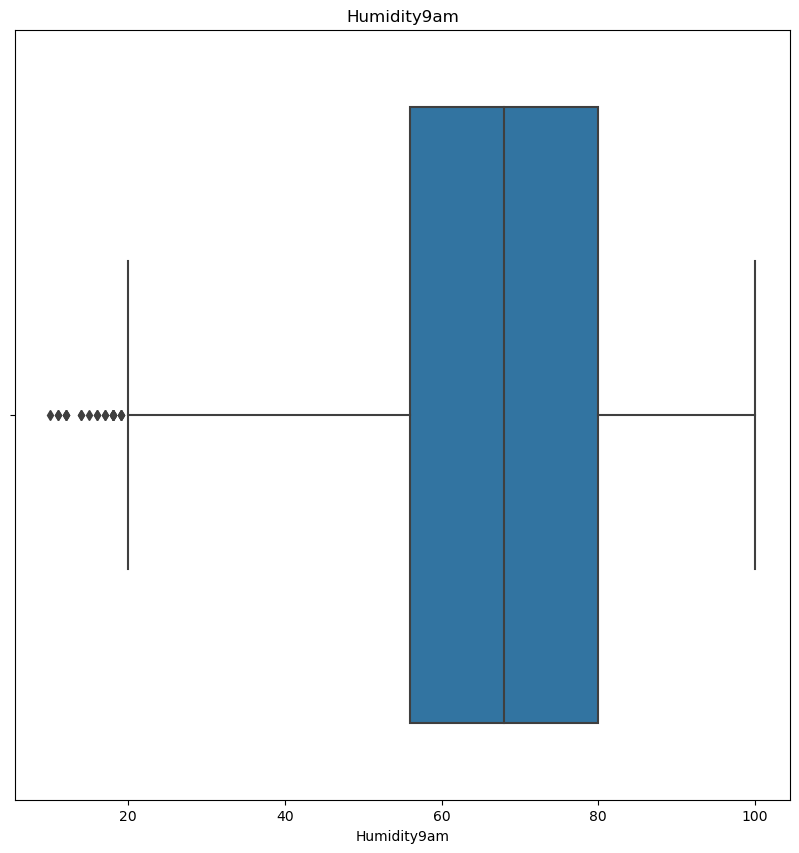

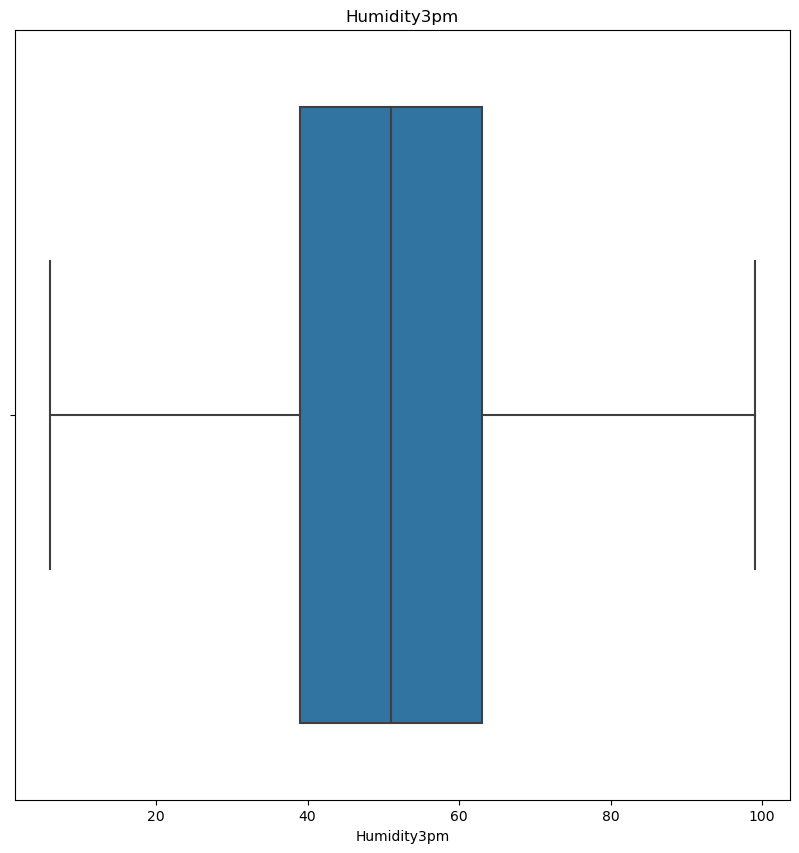

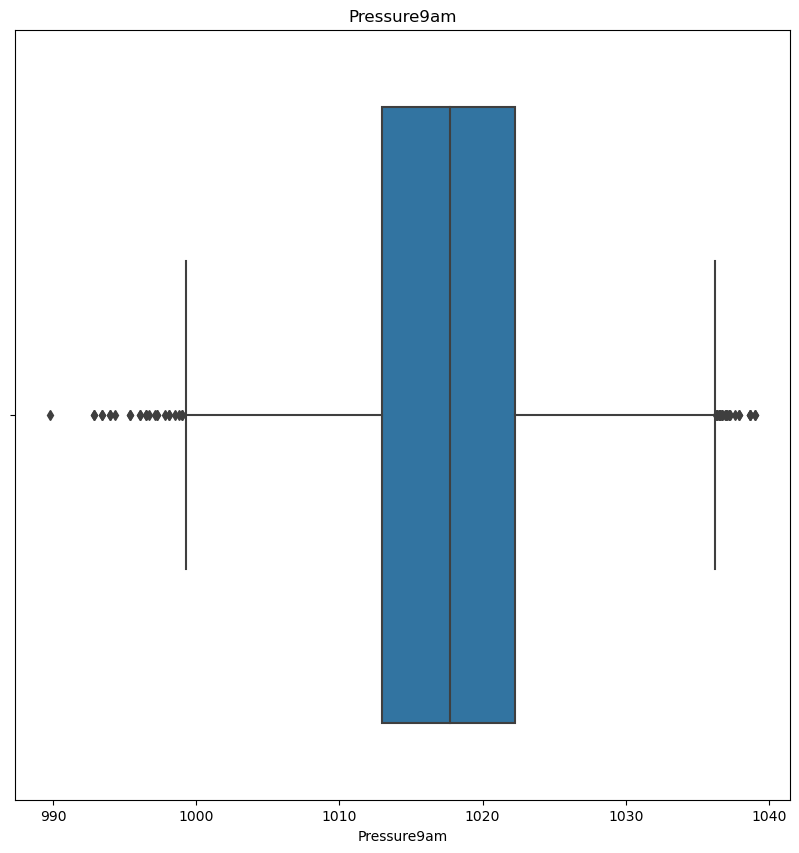

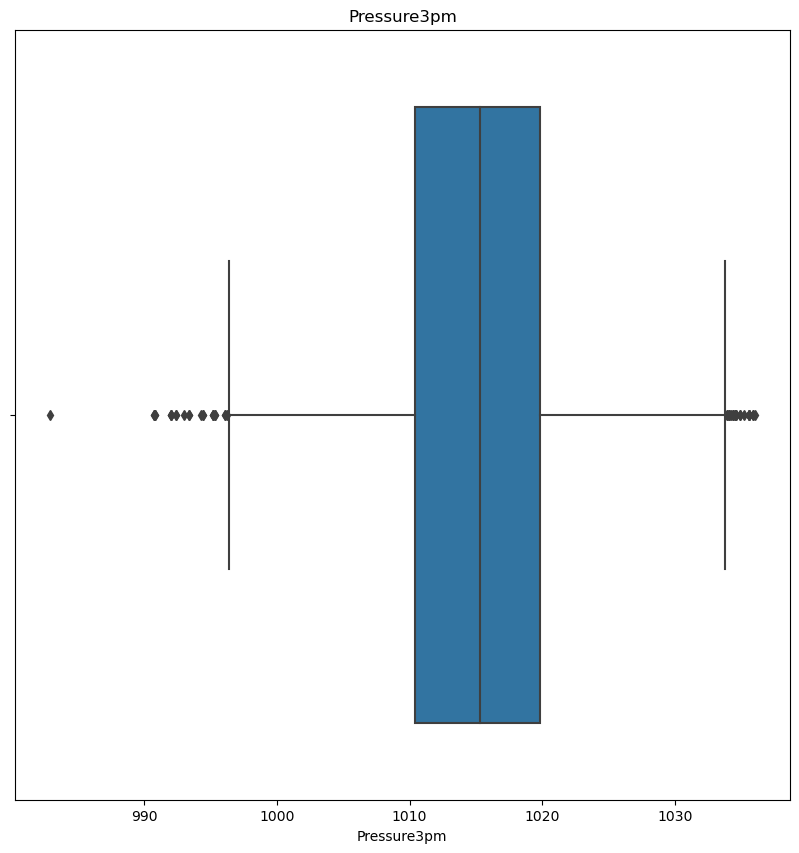

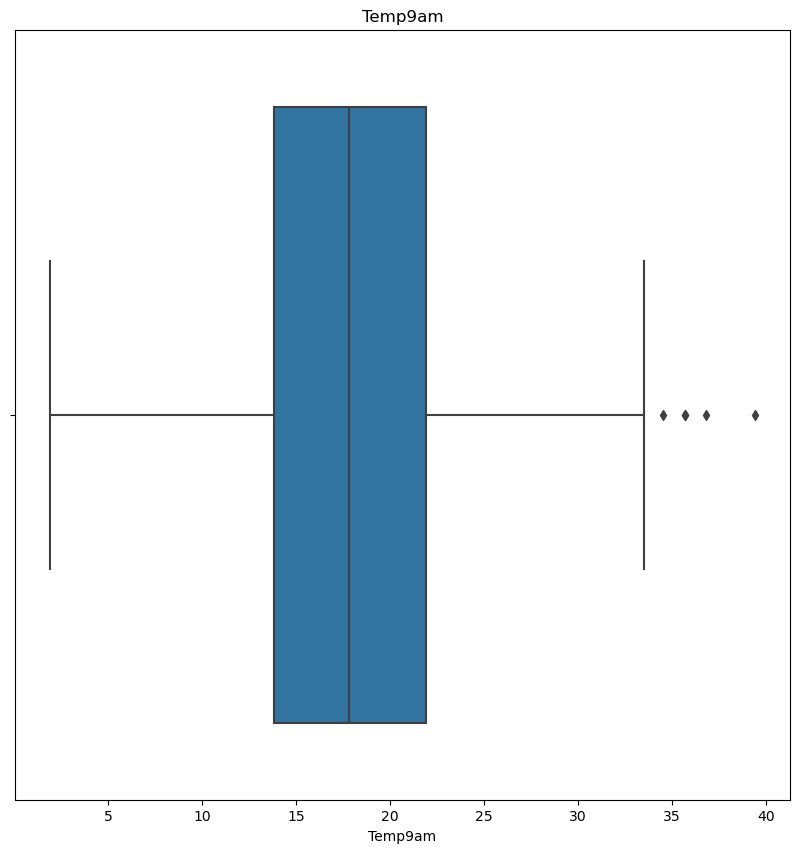

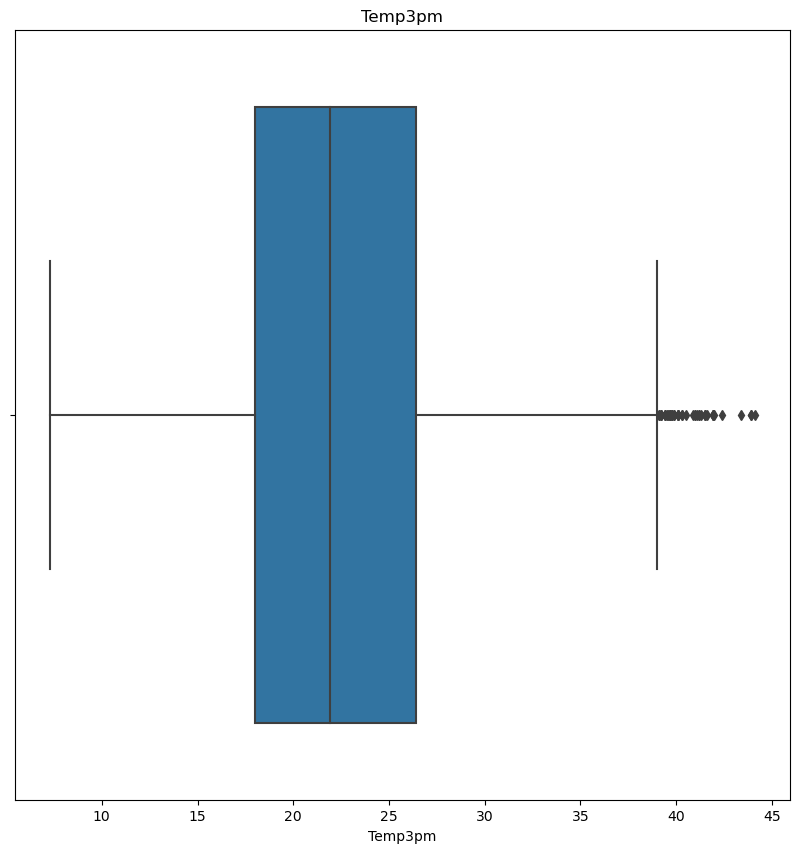

<Figure size 1000x1000 with 0 Axes>

In [65]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(10,10))

In [18]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [19]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,'Cloud9am')
mode_nan(df,'Cloud3pm')

In [20]:
df['Raintoday'] = pd.get_dummies(df['RainToday'],drop_first=True)
df['RainTomorrow'] = pd.get_dummies(df['RainTomorrow'], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Raintoday
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,...,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,No,False,False
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,...,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,No,False,False
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,...,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,No,False,False
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,...,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,No,False,False
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,...,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,No,False,False
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,...,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,No,False,False
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,...,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,No,False,False
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,False,False


In [21]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])['RainTomorrow'].mean().sort_values(ascending = False)).index)

Date Index(['2015-01-26', '2017-02-28', '2014-04-26', '2014-04-27', '2017-02-25',
       '2017-02-26', '2015-11-04', '2015-11-03', '2017-02-27', '2017-03-01',
       ...
       '2013-01-11', '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
       '2013-01-05', '2013-01-04', '2013-01-03', '2013-01-02', '2017-06-25'],
      dtype='object', name='Date', length=3004)
Location Index(['CoffsHarbour', 'Wollongong', 'Melbourne', 'Williamtown', 'Newcastle',
       'Penrith', 'Brisbane', 'Adelaide', 'Albury', 'PerthAirport', 'Darwin',
       'Uluru'],
      dtype='object', name='Location')
WindGustDir Index(['NNW', 'SSW', 'N', 'WSW', 'NW', 'SW', 'NNE', 'S', 'WNW', 'NE', 'SSE',
       'SE', 'ESE', 'W', 'ENE', 'E'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['N', 'WNW', 'SW', 'W', 'NNE', 'NNW', 'SSW', 'ESE', 'WSW', 'S', 'NW',
       'NE', 'SSE', 'SE', 'ENE', 'E'],
      dtype='object', name='WindDir9am')
WindDir3pm Index(['NNW', 'SSW', 'N', 'NW', 'S', 'WSW', 'SW', 'NNE', 'S

In [22]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [23]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].value_counts().index[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].value_counts().index[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].value_counts().index[0])

In [24]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

df.isnull().sum()*100/len(df)



Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       0.000000
WindGustSpeed    11.762611
WindDir9am        0.000000
WindDir3pm        0.000000
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      0.000000
Raintoday         0.000000
dtype: float64

In [25]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       0.000000
WindGustSpeed    11.762611
WindDir9am        0.000000
WindDir3pm        0.000000
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      0.000000
Raintoday         0.000000
dtype: float64

In [26]:
df1 = df.groupby(['Location'])['RainTomorrow'].value_counts().sort_values().unstack()

In [27]:
df1

RainTomorrow,False,True
Location,,
Adelaide,160.0,45.0
Albury,708.0,199.0
Brisbane,444.0,135.0
CoffsHarbour,425.0,186.0
Darwin,218.0,32.0
Melbourne,1216.0,406.0
Newcastle,624.0,198.0
Penrith,366.0,116.0
PerthAirport,962.0,242.0


In [28]:
df1[1].sort_values(ascending = False).index

KeyError: 1

In [29]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

In [30]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [31]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [32]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Raintoday,Date_month,Date_day
0,NaT,30,13.4,22.9,0.6,3.0,13.8,4.0,44.0,5.0,...,1007.1,8.0,8.0,16.9,21.8,No,False,False,NaN,NaN
1,NaT,30,7.4,25.1,0.0,2.2,7.6,2.0,44.0,0.0,...,1007.8,1.0,4.0,17.2,24.3,No,False,False,NaN,NaN
2,NaT,30,12.9,25.7,0.0,4.6,7.7,5.0,46.0,5.0,...,1008.7,2.0,2.0,21.0,23.2,No,False,False,NaN,NaN
3,NaT,30,9.2,28.0,0.0,1.8,8.0,11.0,24.0,13.0,...,1012.8,8.0,7.0,18.1,26.5,No,False,False,NaN,NaN
4,NaT,30,17.5,32.3,1.0,3.8,11.9,4.0,41.0,12.0,...,1006.0,7.0,8.0,17.8,29.7,No,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,NaT,49,2.8,23.4,0.0,6.4,1.2,15.0,31.0,13.0,...,1020.3,8.0,4.0,10.1,22.4,No,False,False,NaN,NaN
8421,NaT,49,3.6,25.3,0.0,12.6,7.1,0.0,22.0,13.0,...,1019.1,1.0,1.0,10.9,24.5,No,False,False,NaN,NaN
8422,NaT,49,5.4,26.9,0.0,4.2,13.0,3.0,37.0,13.0,...,1016.8,6.0,5.0,12.5,26.1,No,False,False,NaN,NaN
8423,NaT,49,7.8,27.0,0.0,4.0,13.1,12.0,28.0,11.0,...,1016.5,3.0,2.0,15.1,26.0,No,False,False,NaN,NaN


In [ ]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

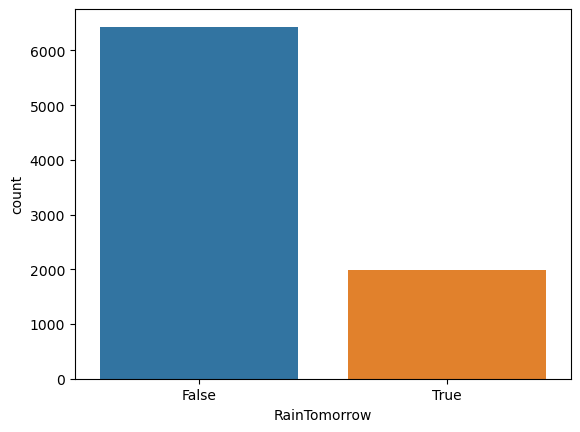

In [35]:
sns.countplot(df['RainTomorrow'])

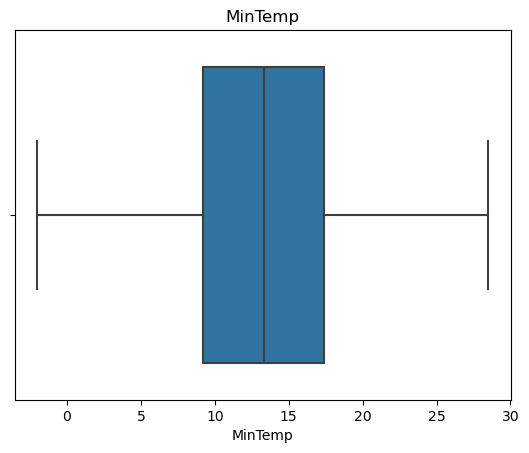

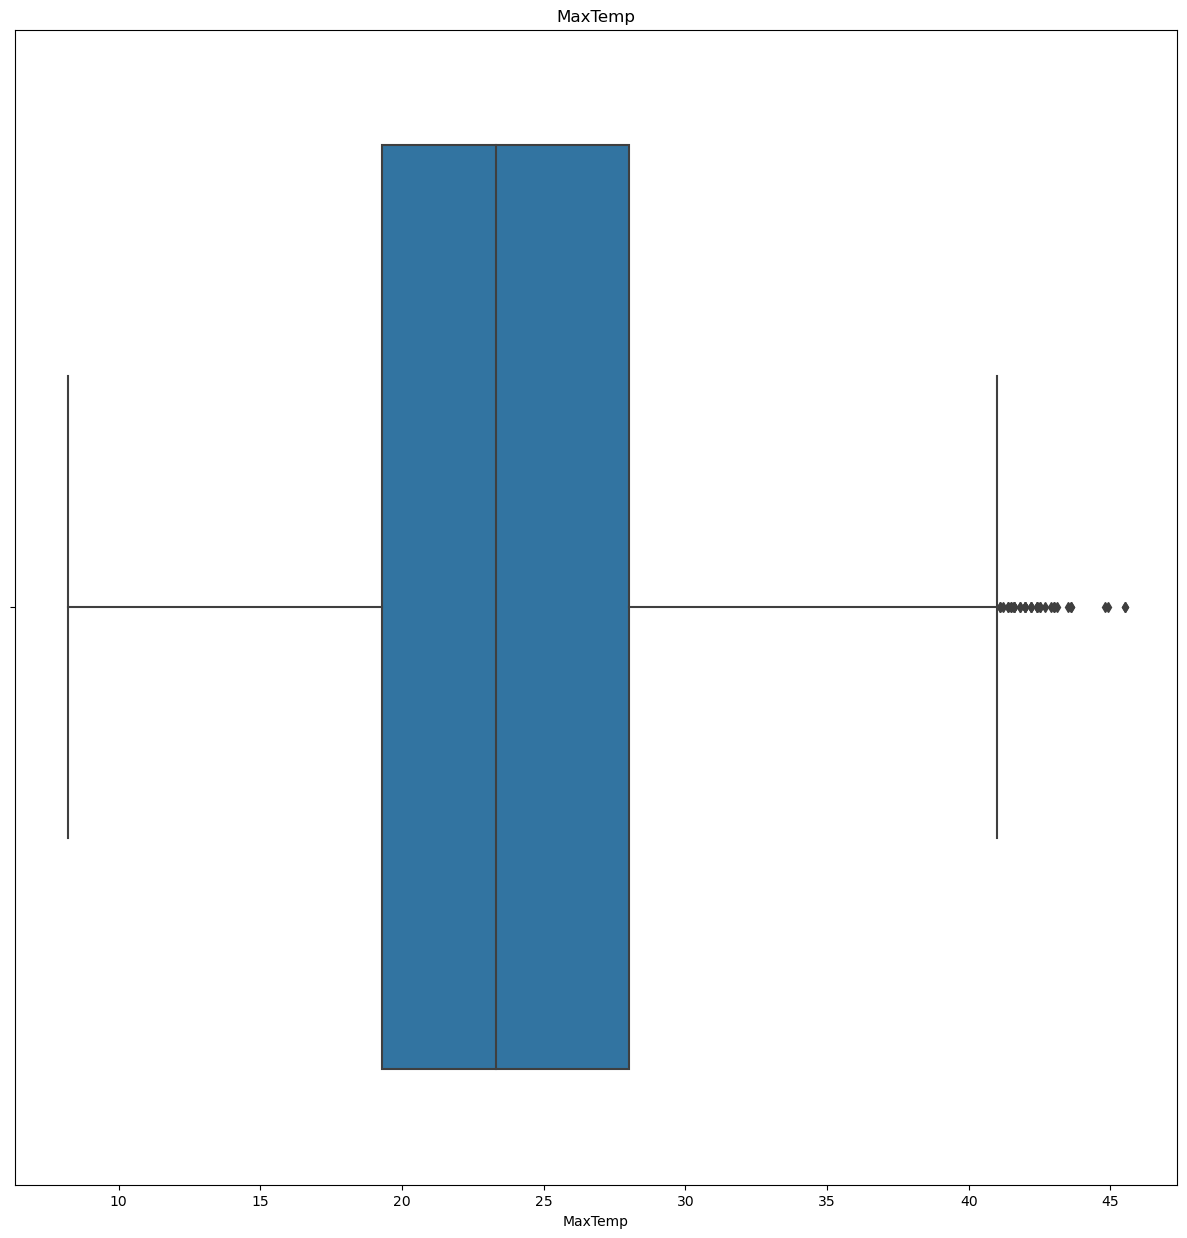

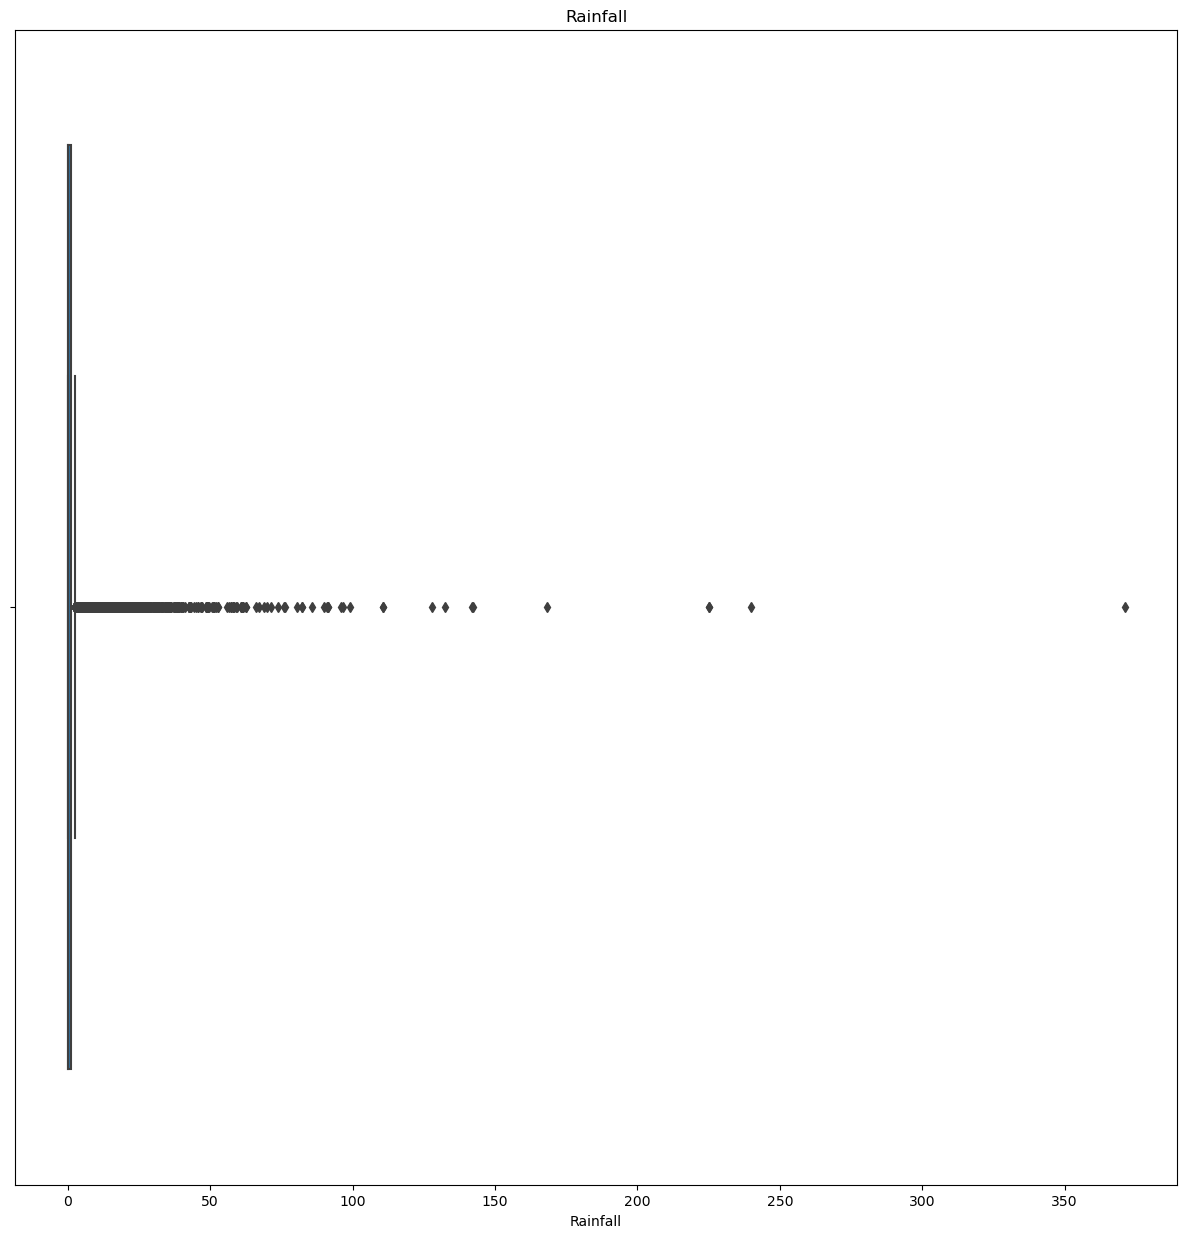

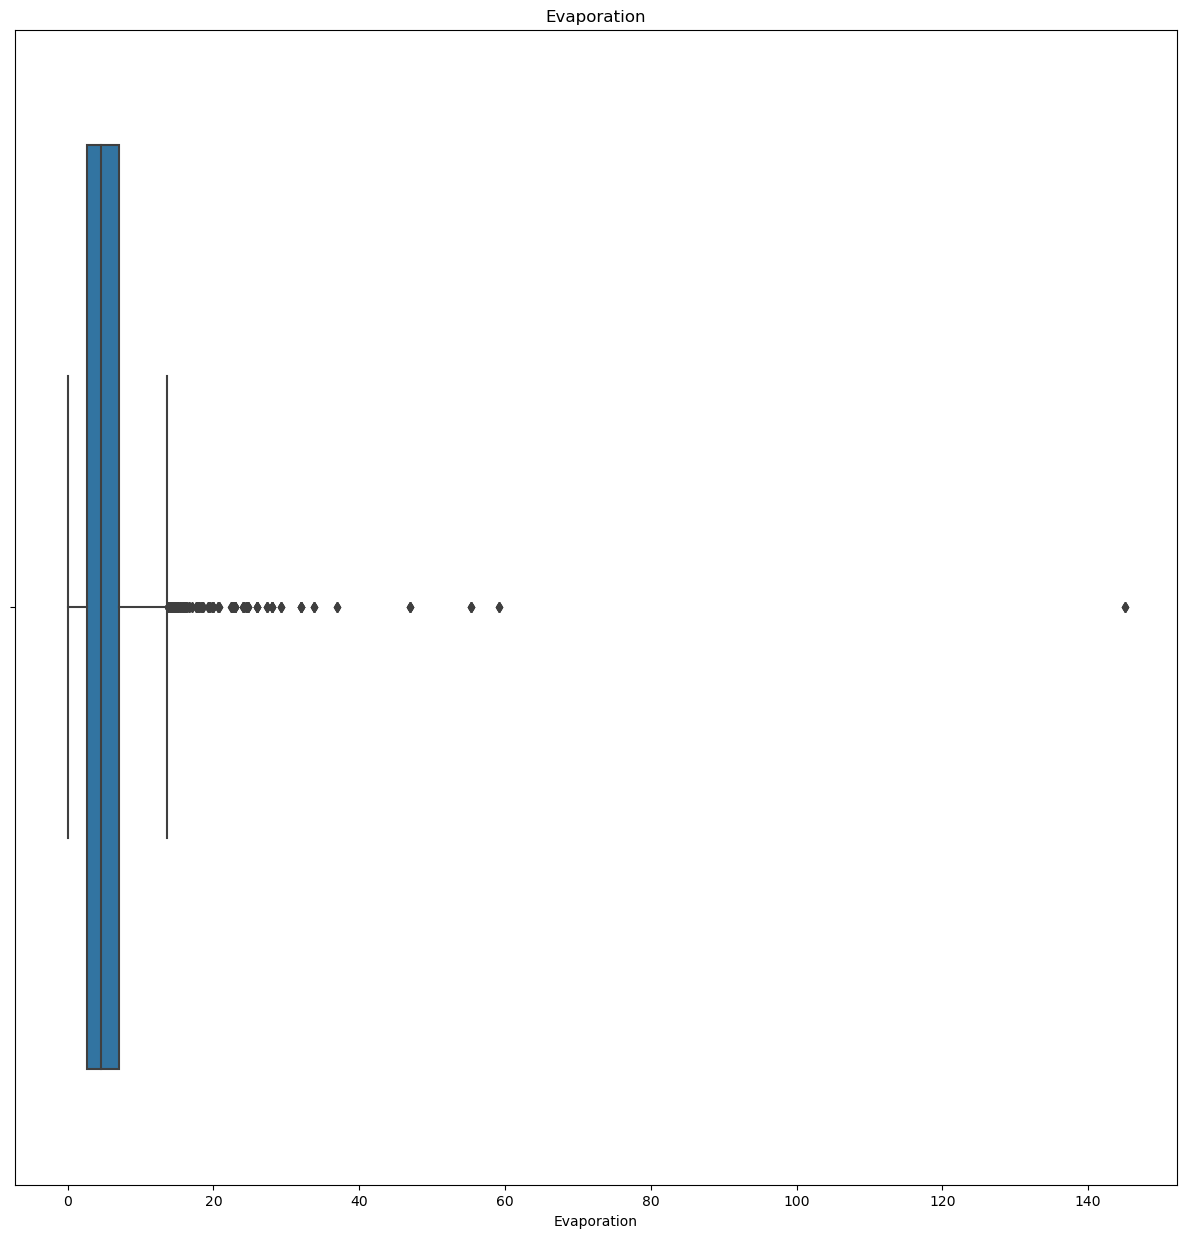

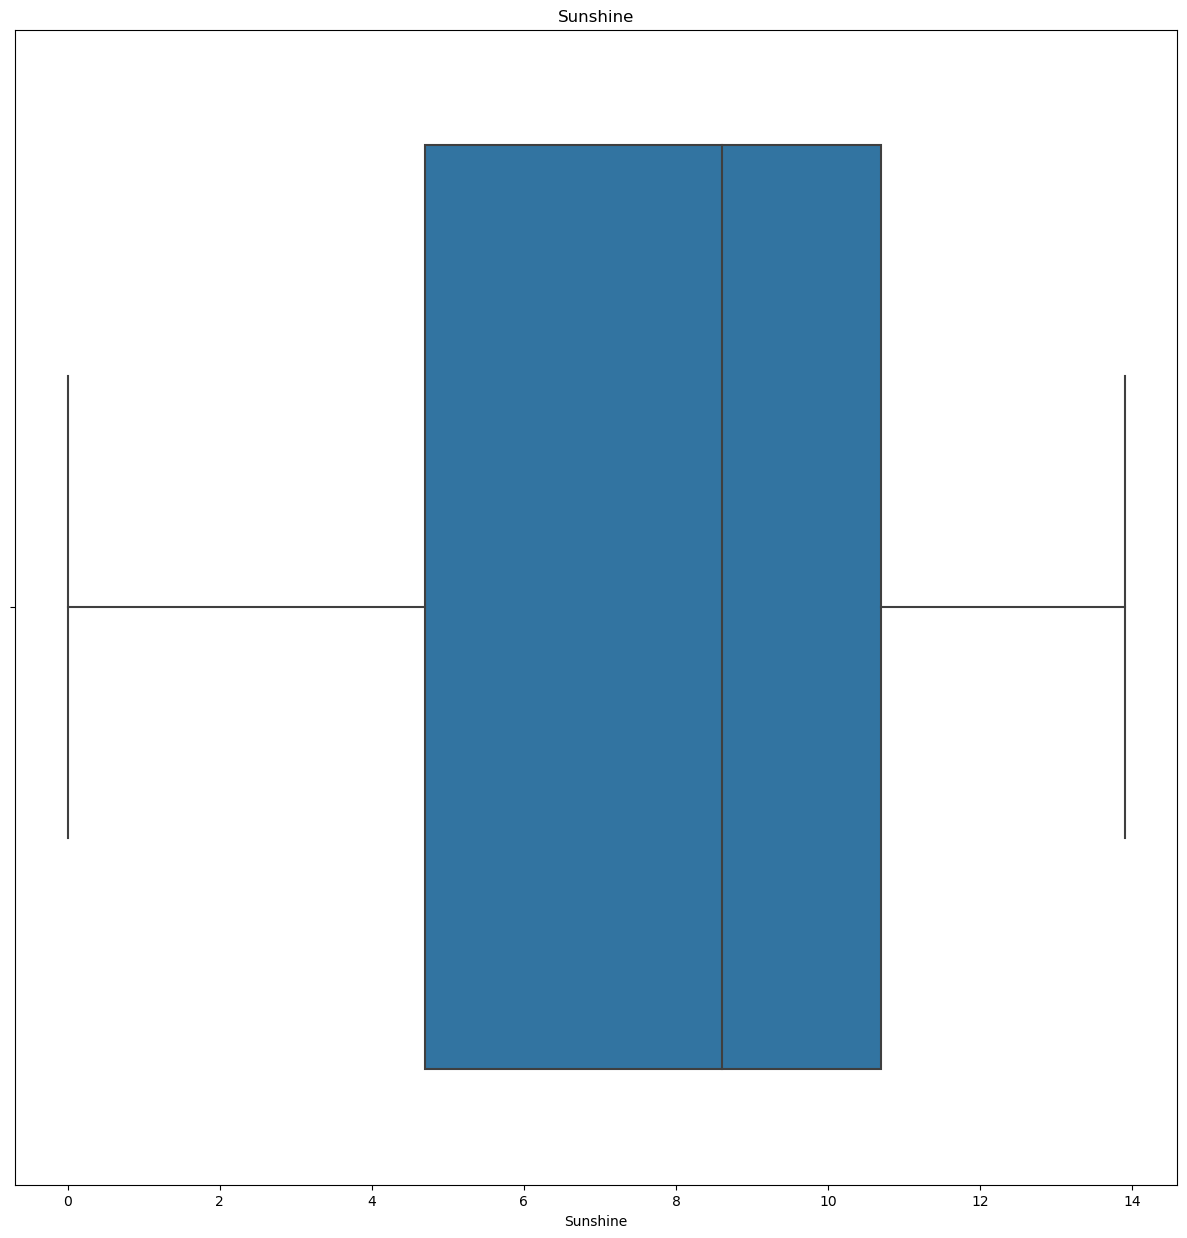

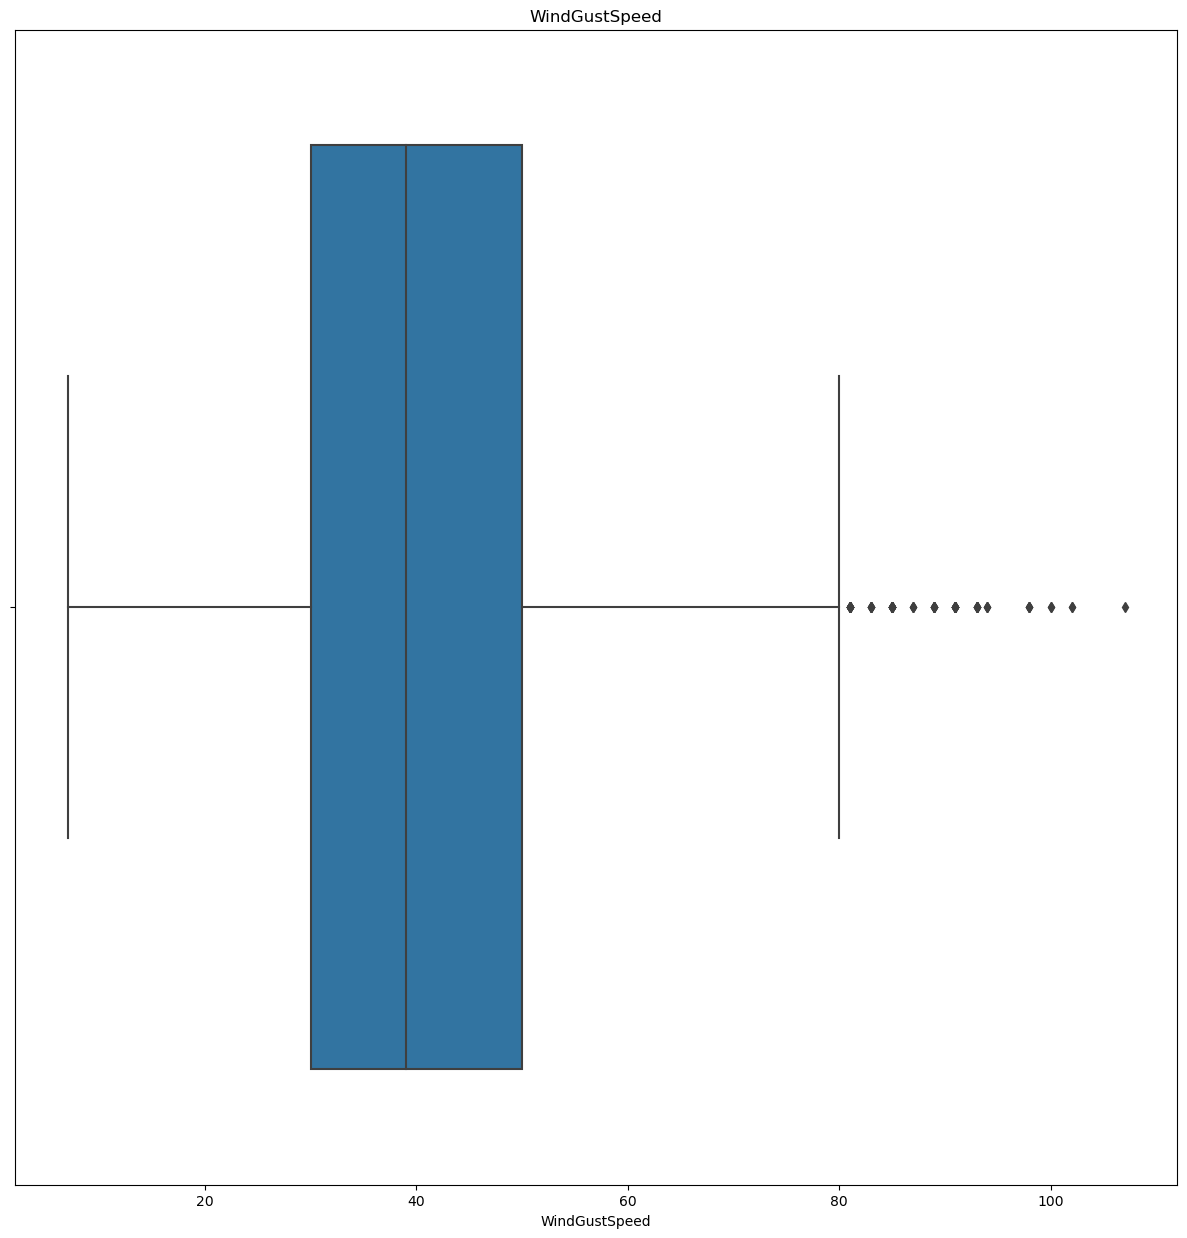

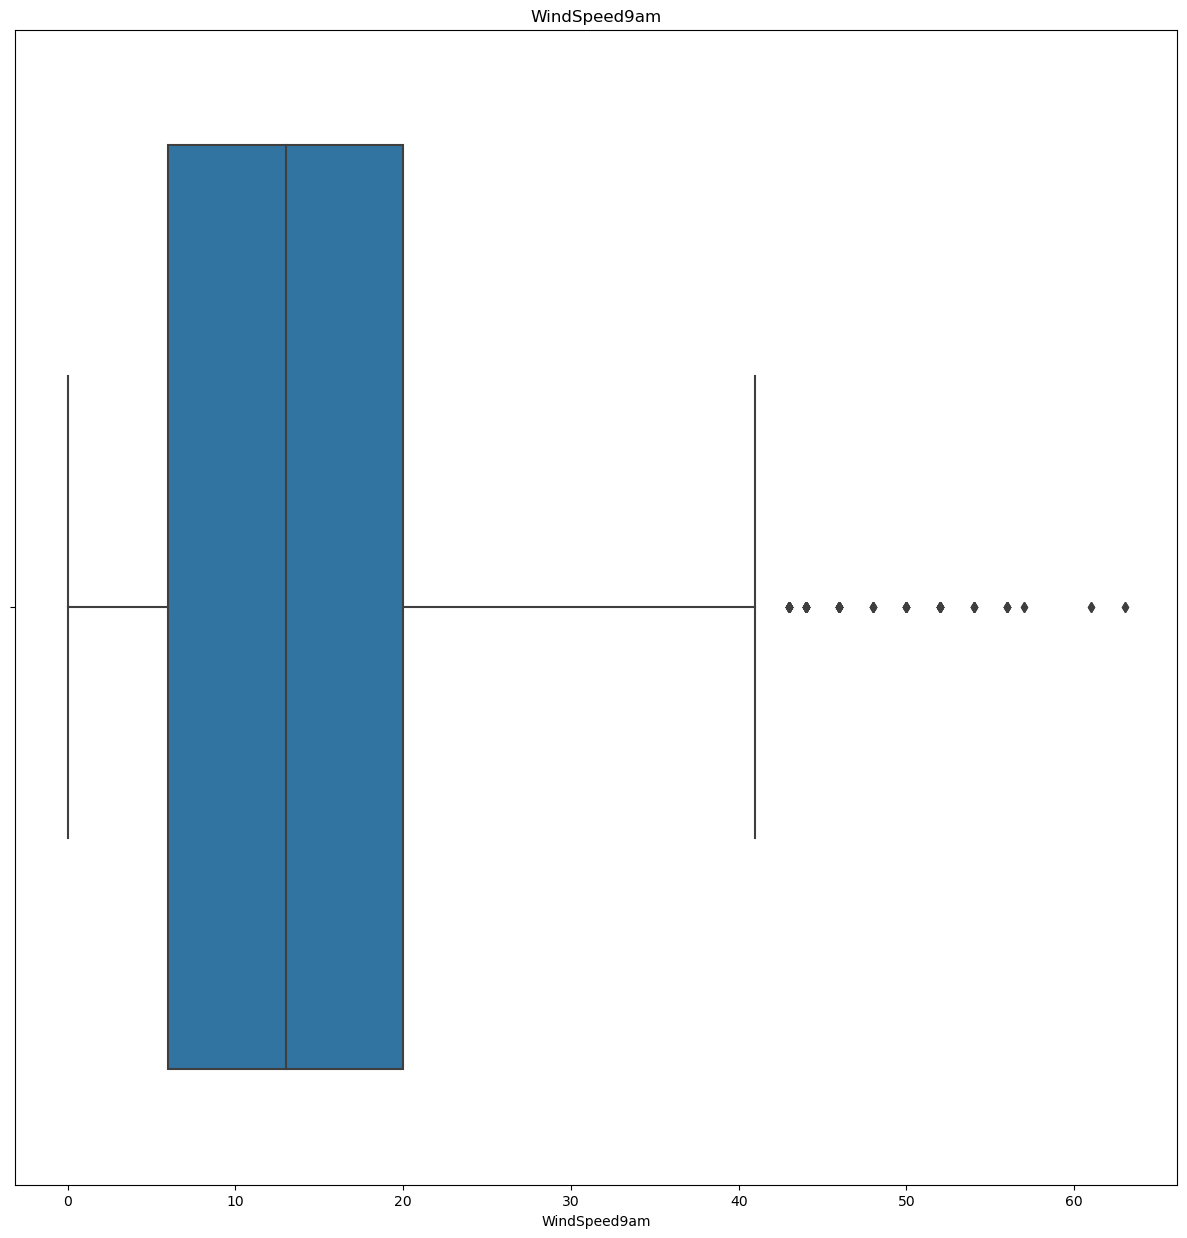

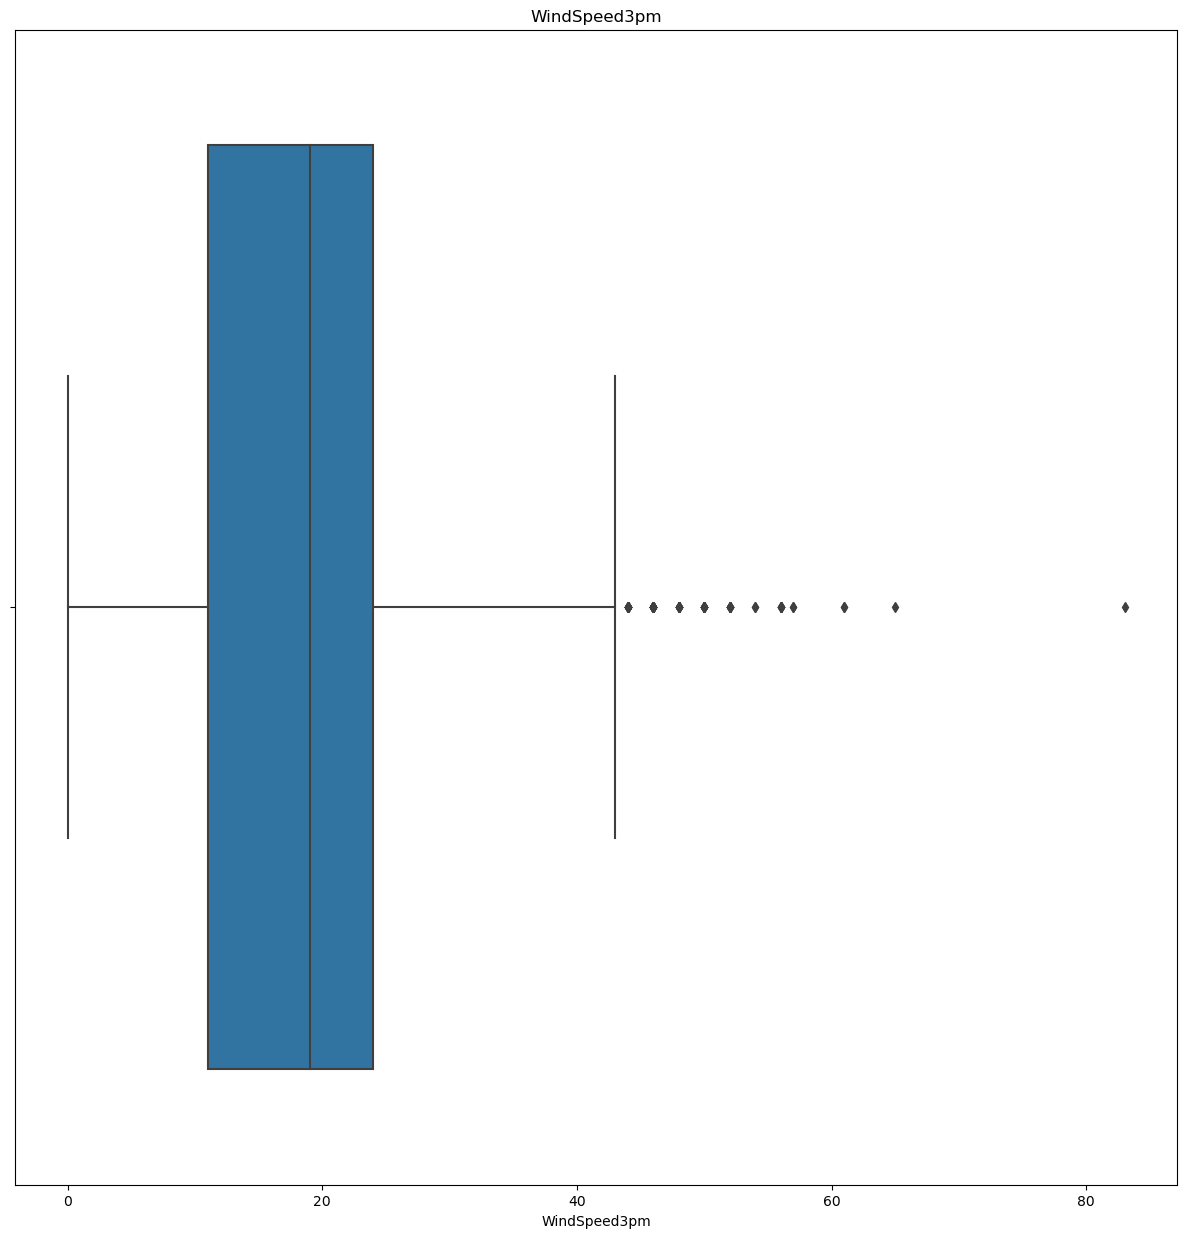

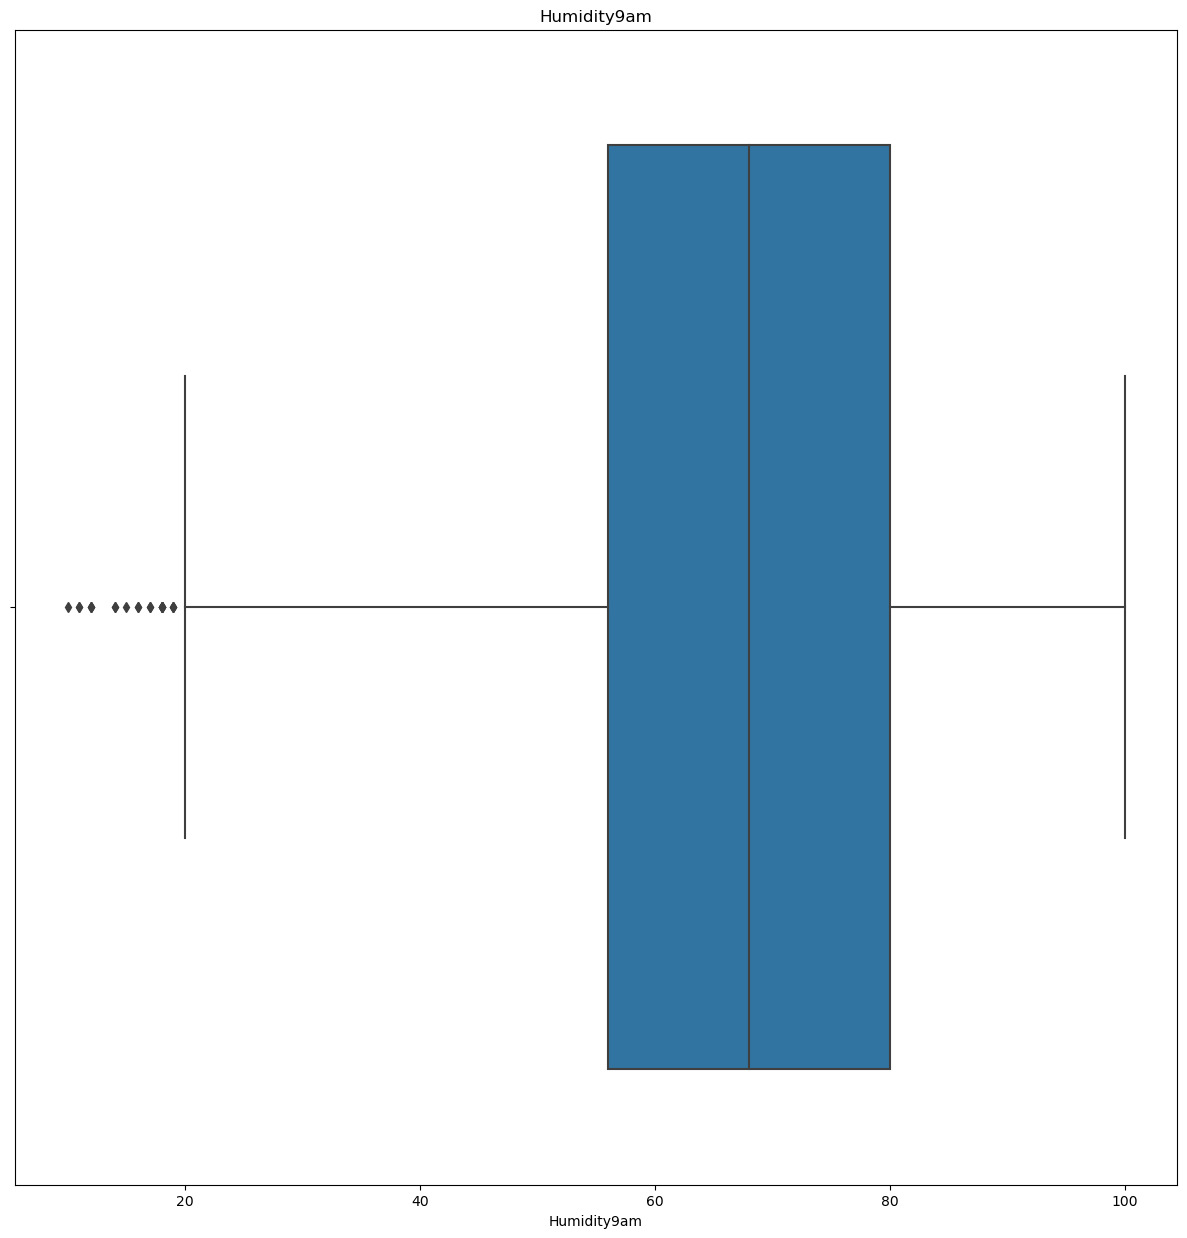

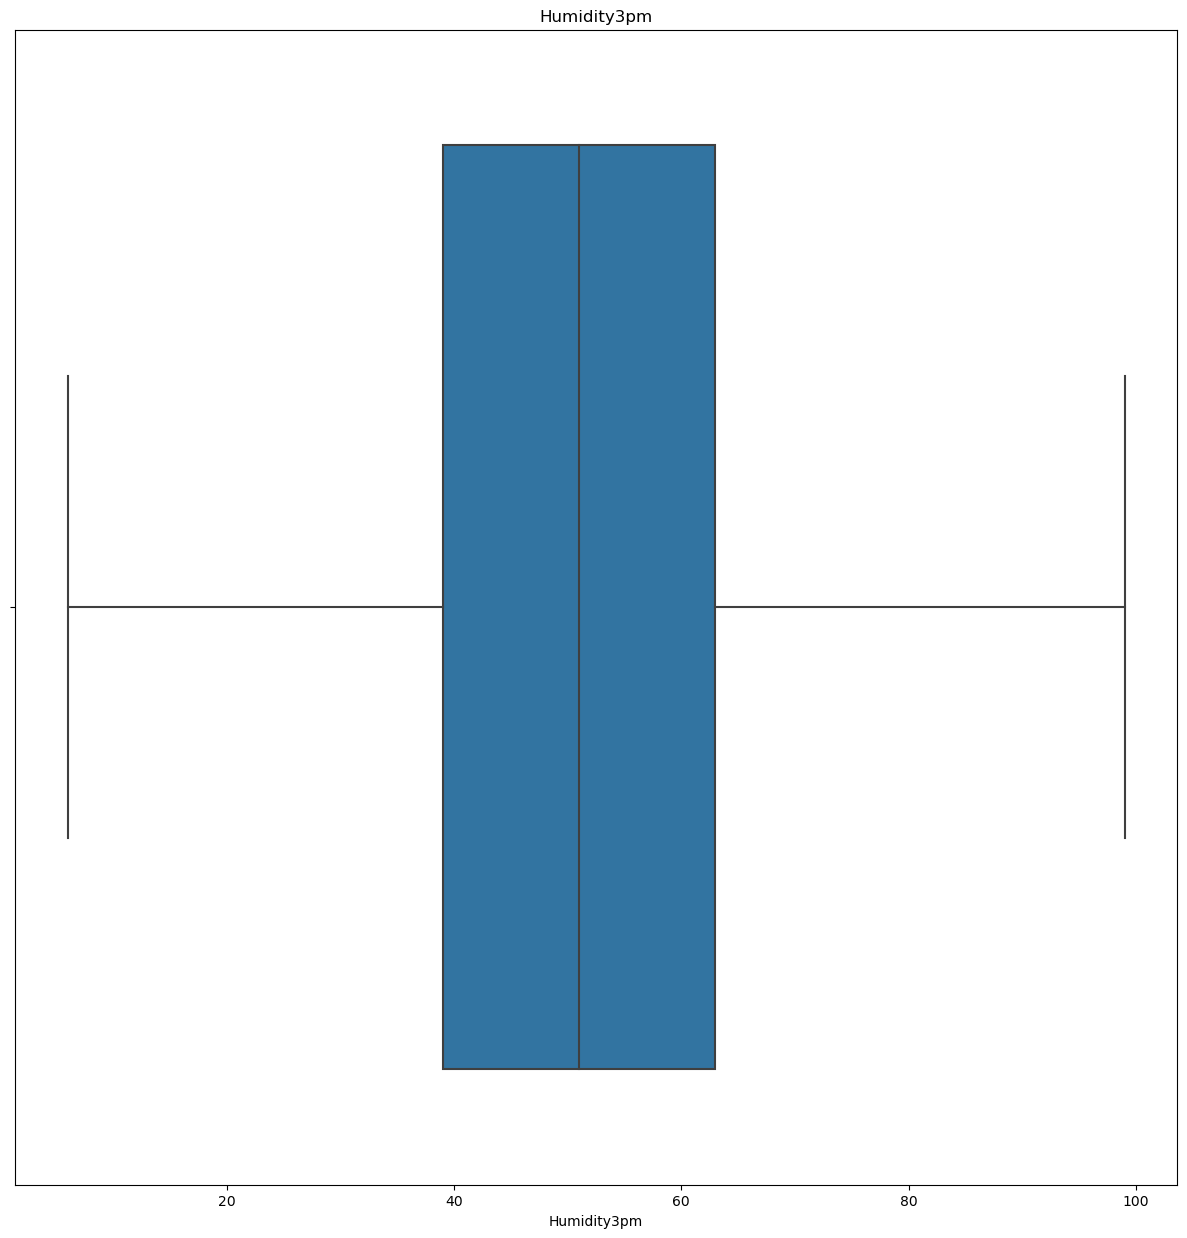

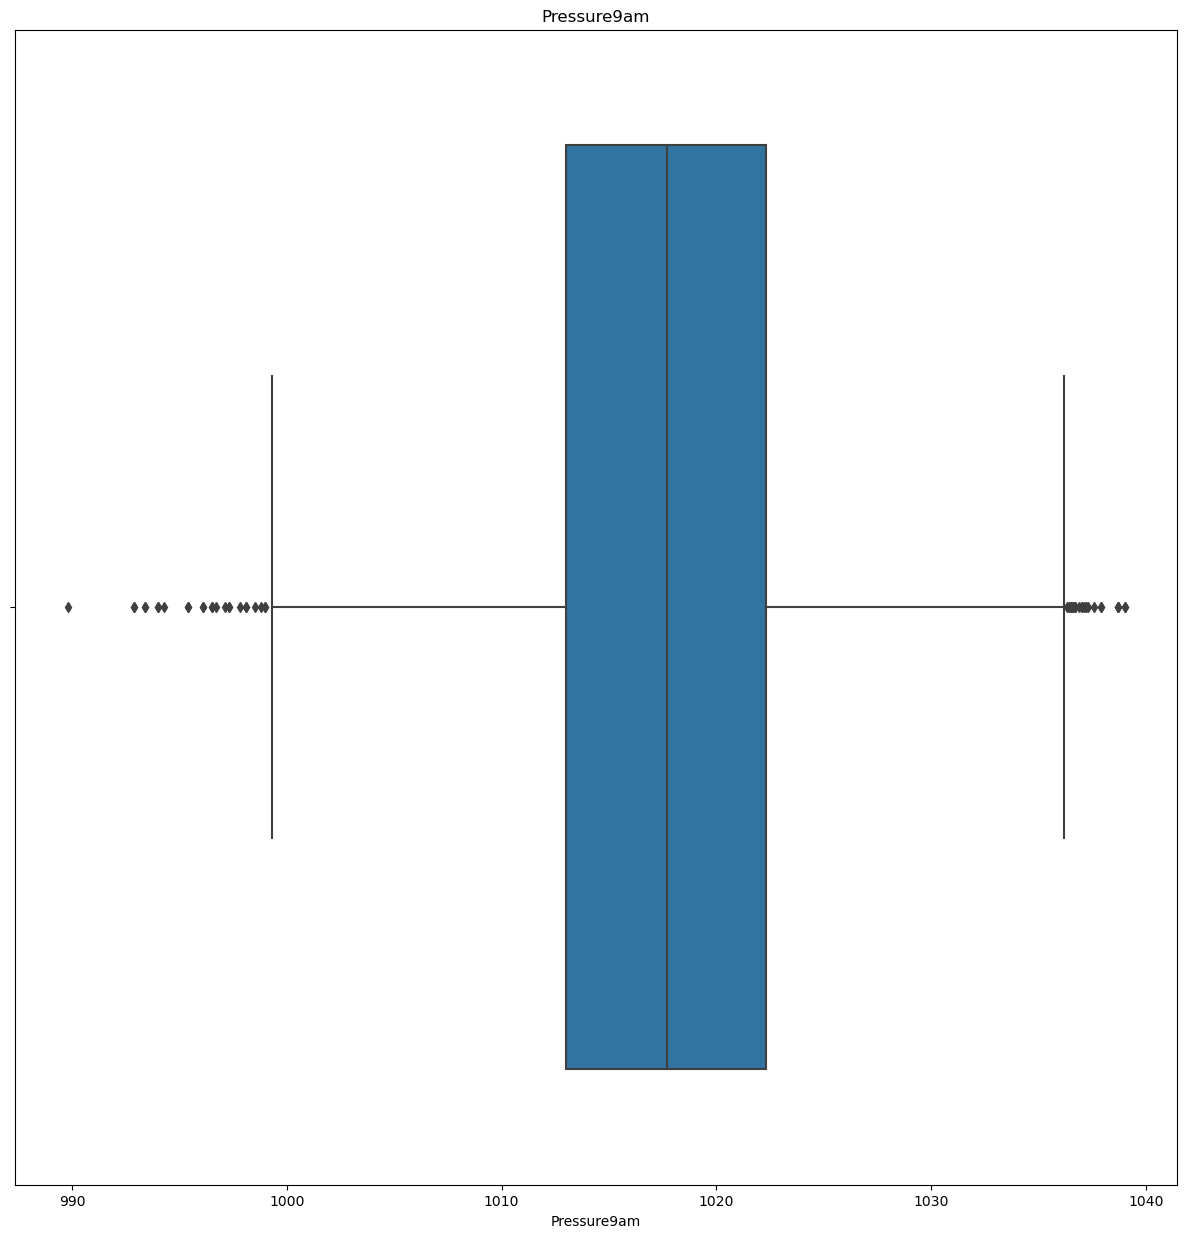

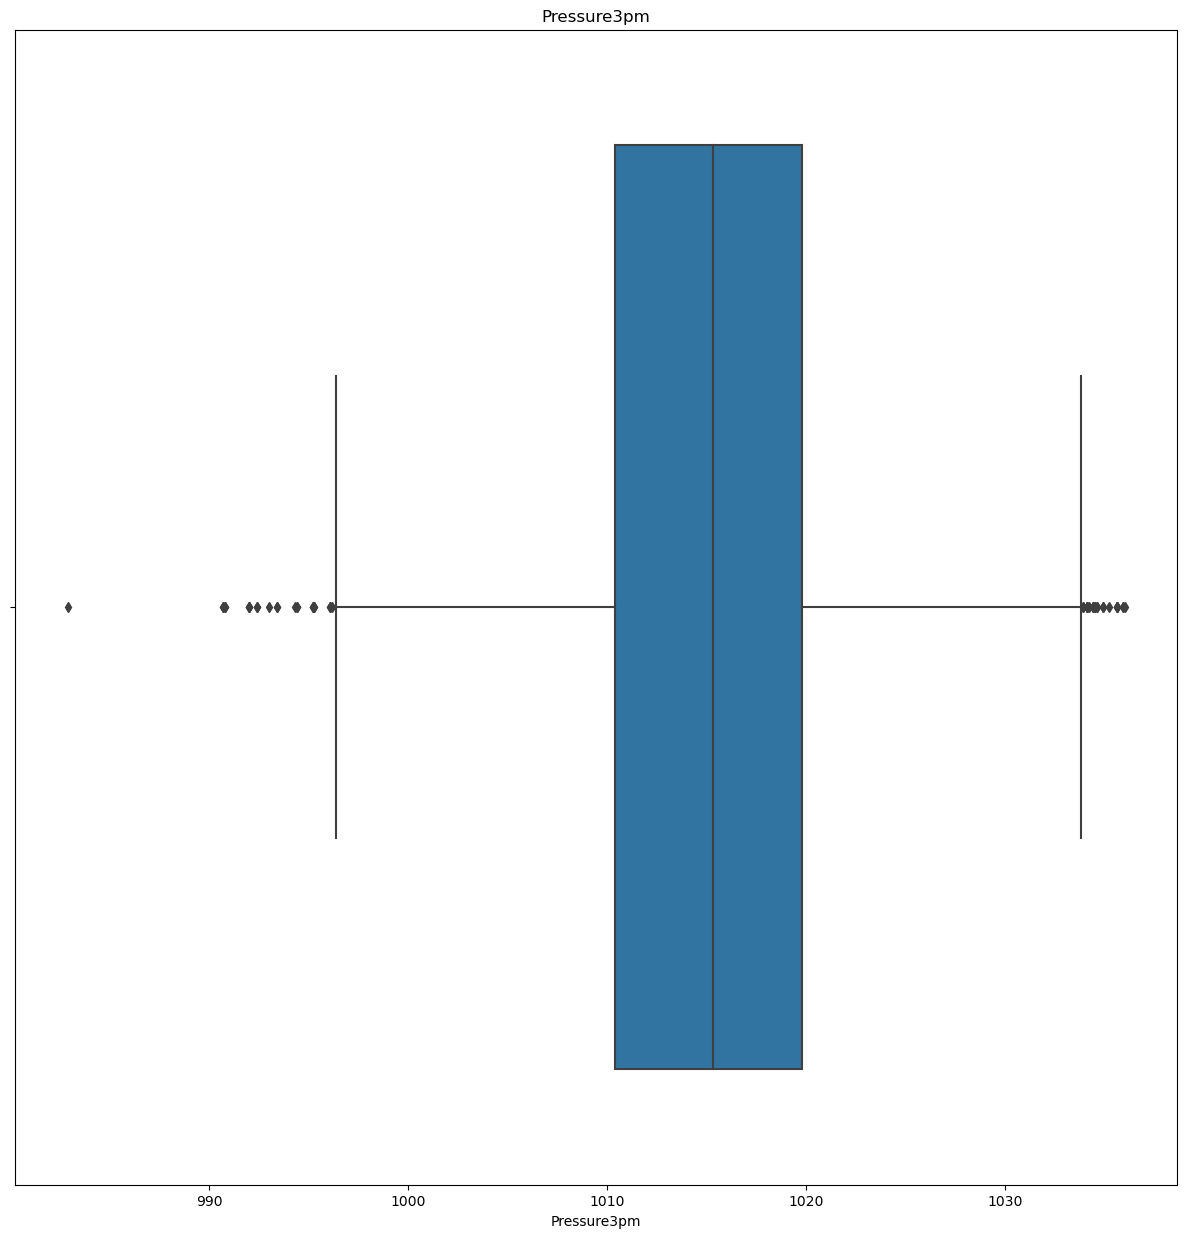

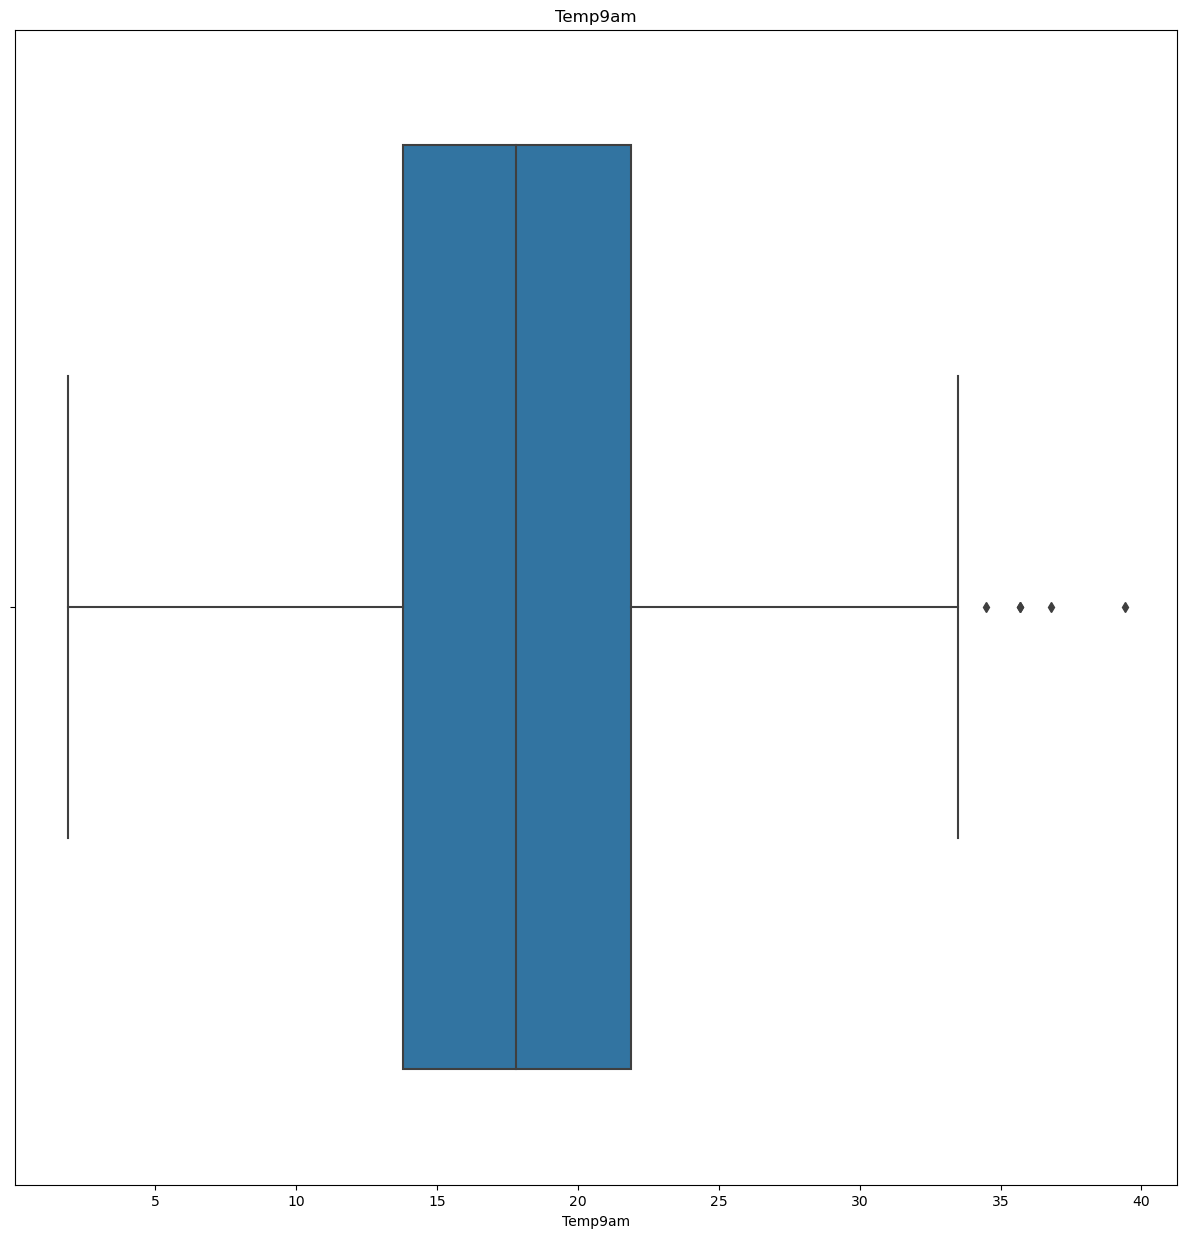

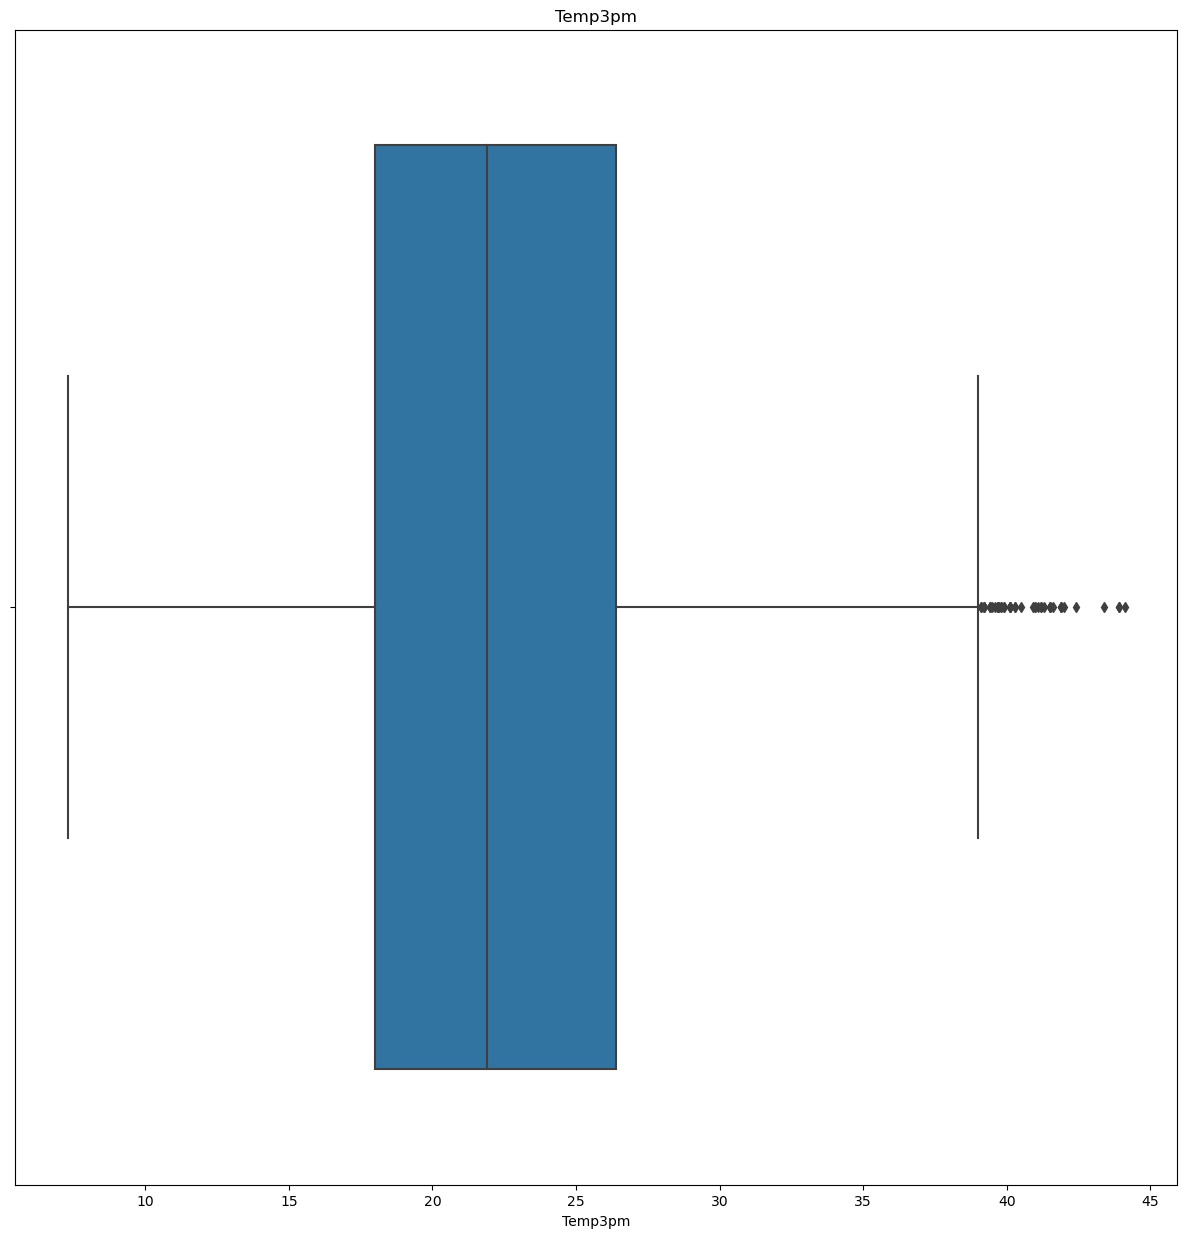

<Figure size 1500x1500 with 0 Axes>

In [36]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [37]:
for feature in continuous_feature:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


In [38]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.0999999999999996 29.699999999999996


In [39]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [40]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

6.250000000000002 41.05


In [41]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [42]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.5 2.5


In [43]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [44]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.0 13.600000000000001


In [45]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [46]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

0.0 80.0


In [47]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [48]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-15.0 41.0


In [49]:
df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [50]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-8.5 43.5


In [51]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [52]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

20.0 116.0


In [53]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [54]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

999.0500000000001 1036.25


In [55]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [56]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

996.3 1033.8999999999999


In [57]:
df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [58]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.650000000000004 34.05


In [59]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [122]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.400000000000002 39.0


In [60]:
df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

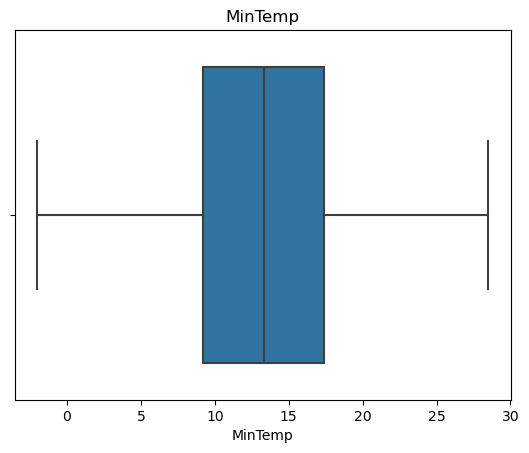

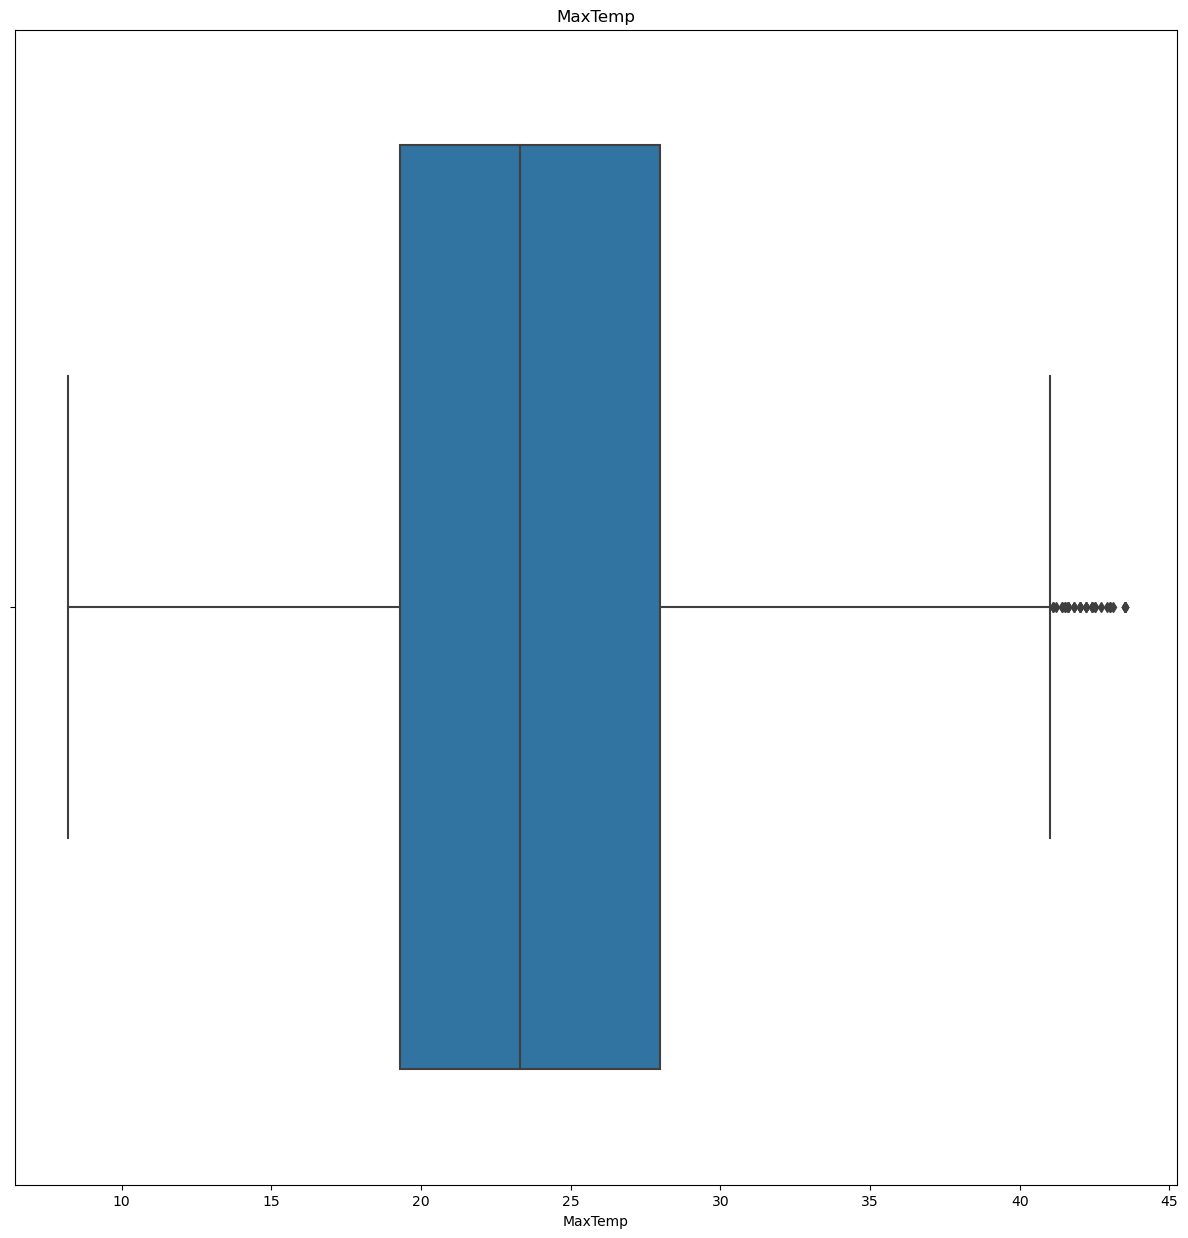

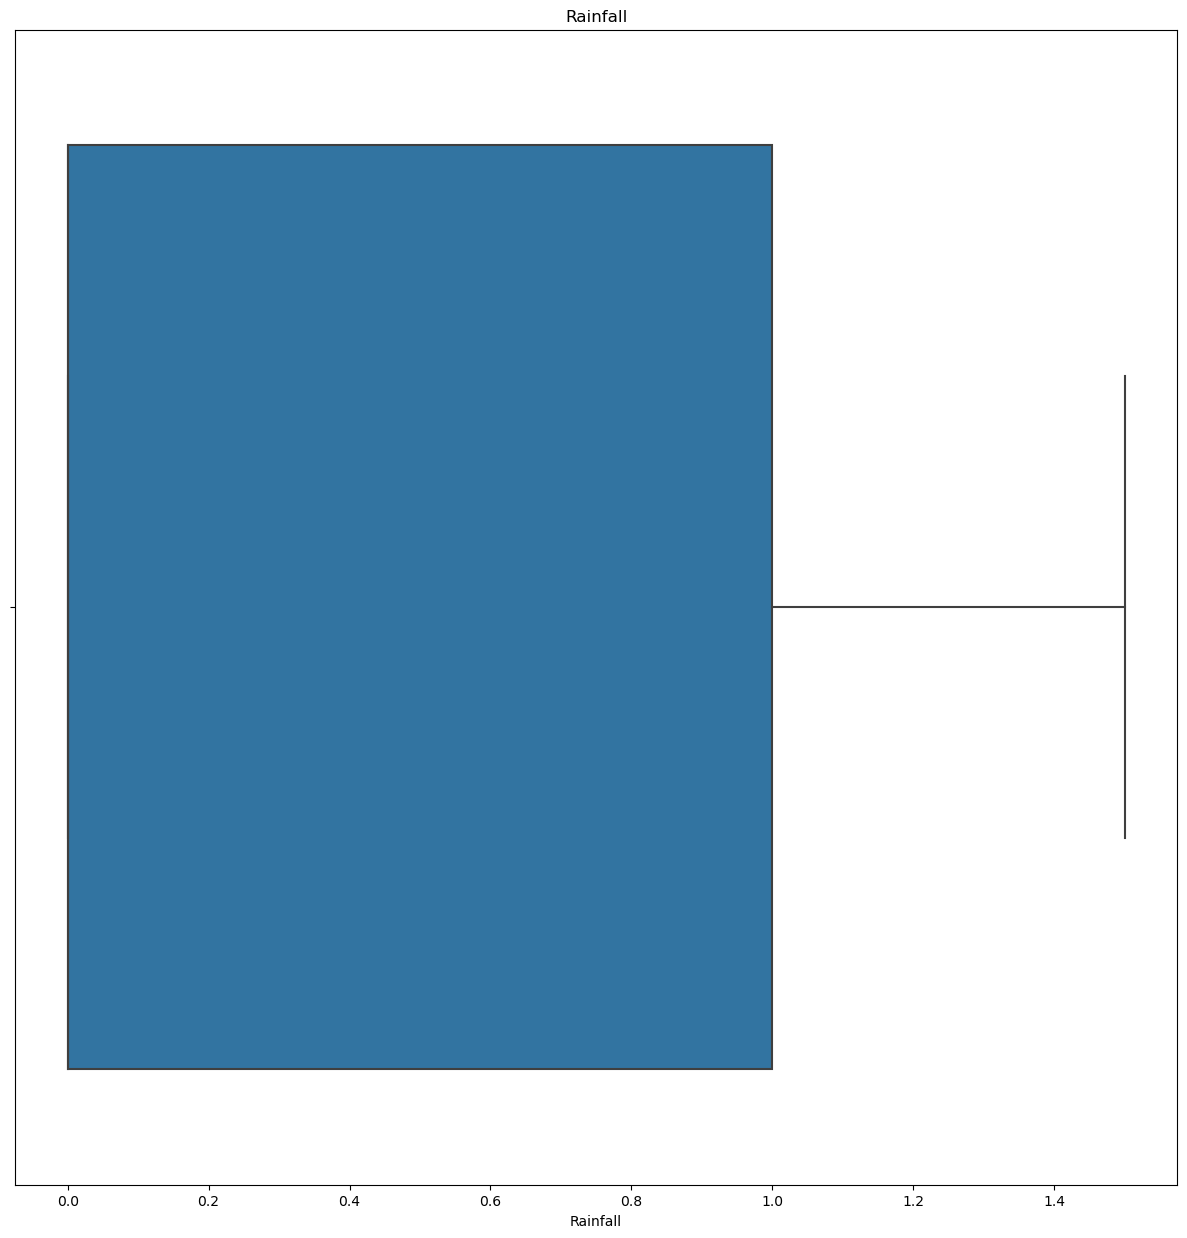

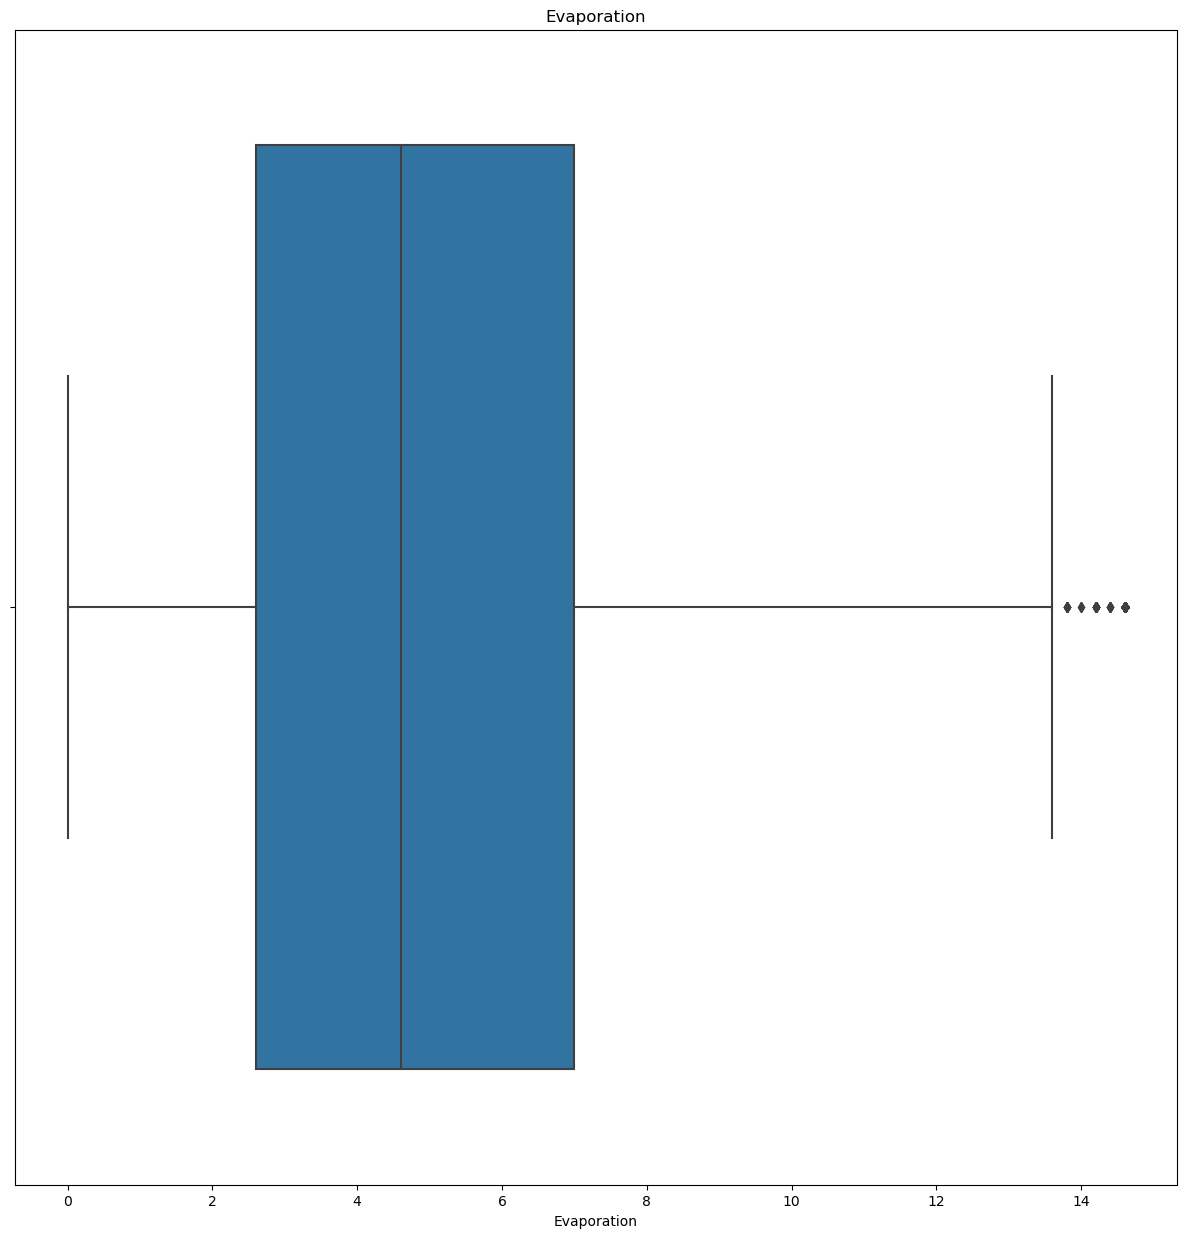

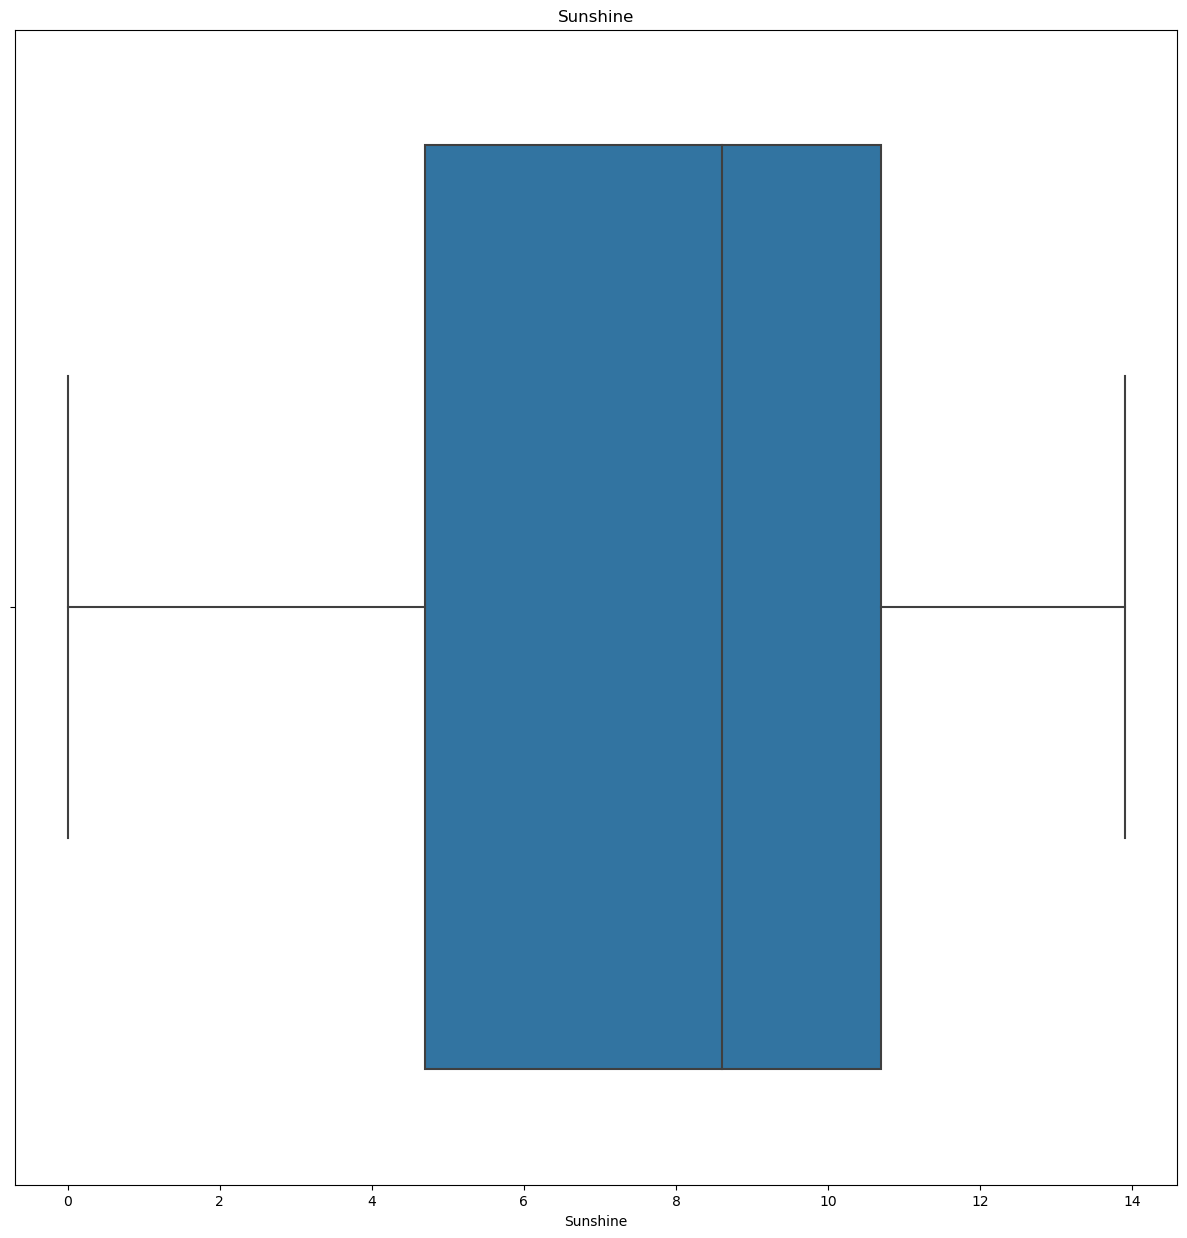

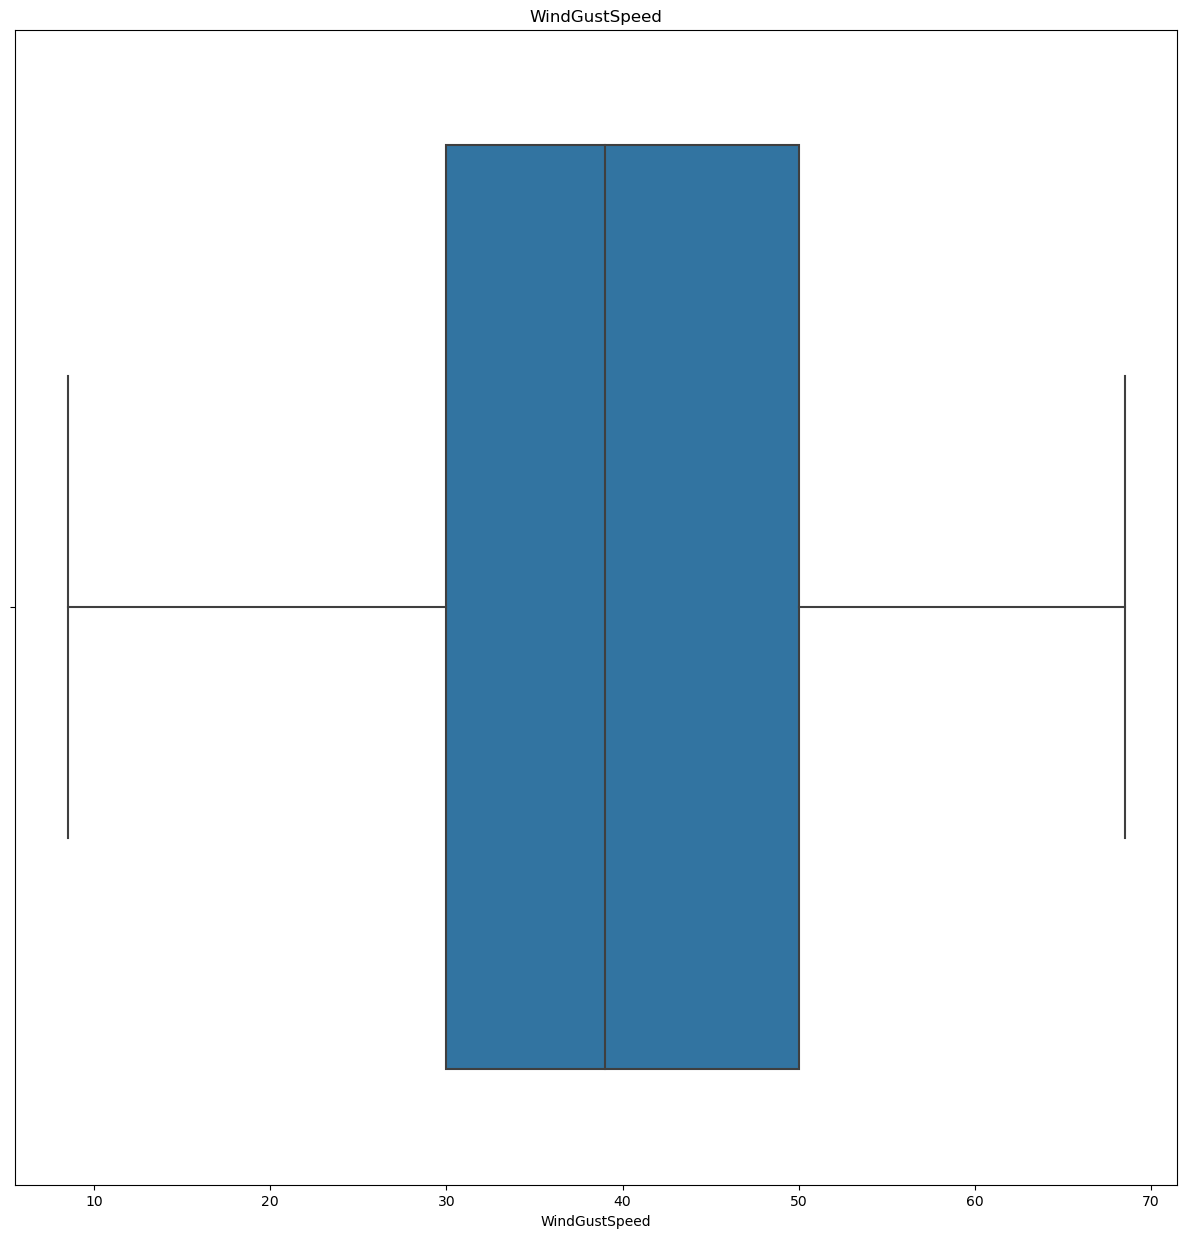

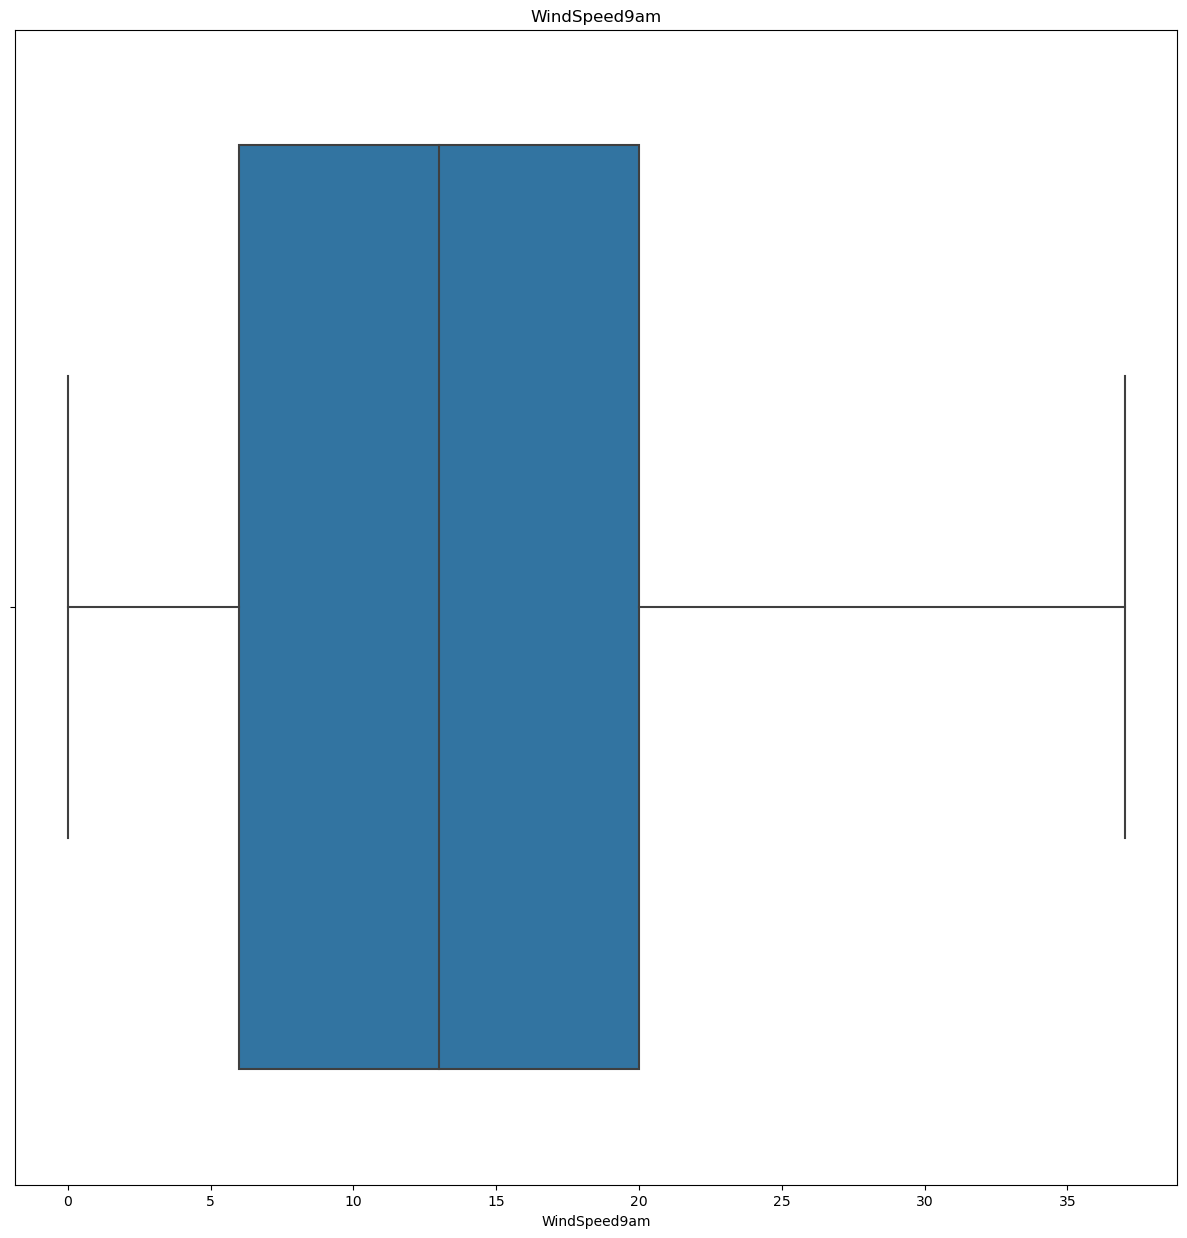

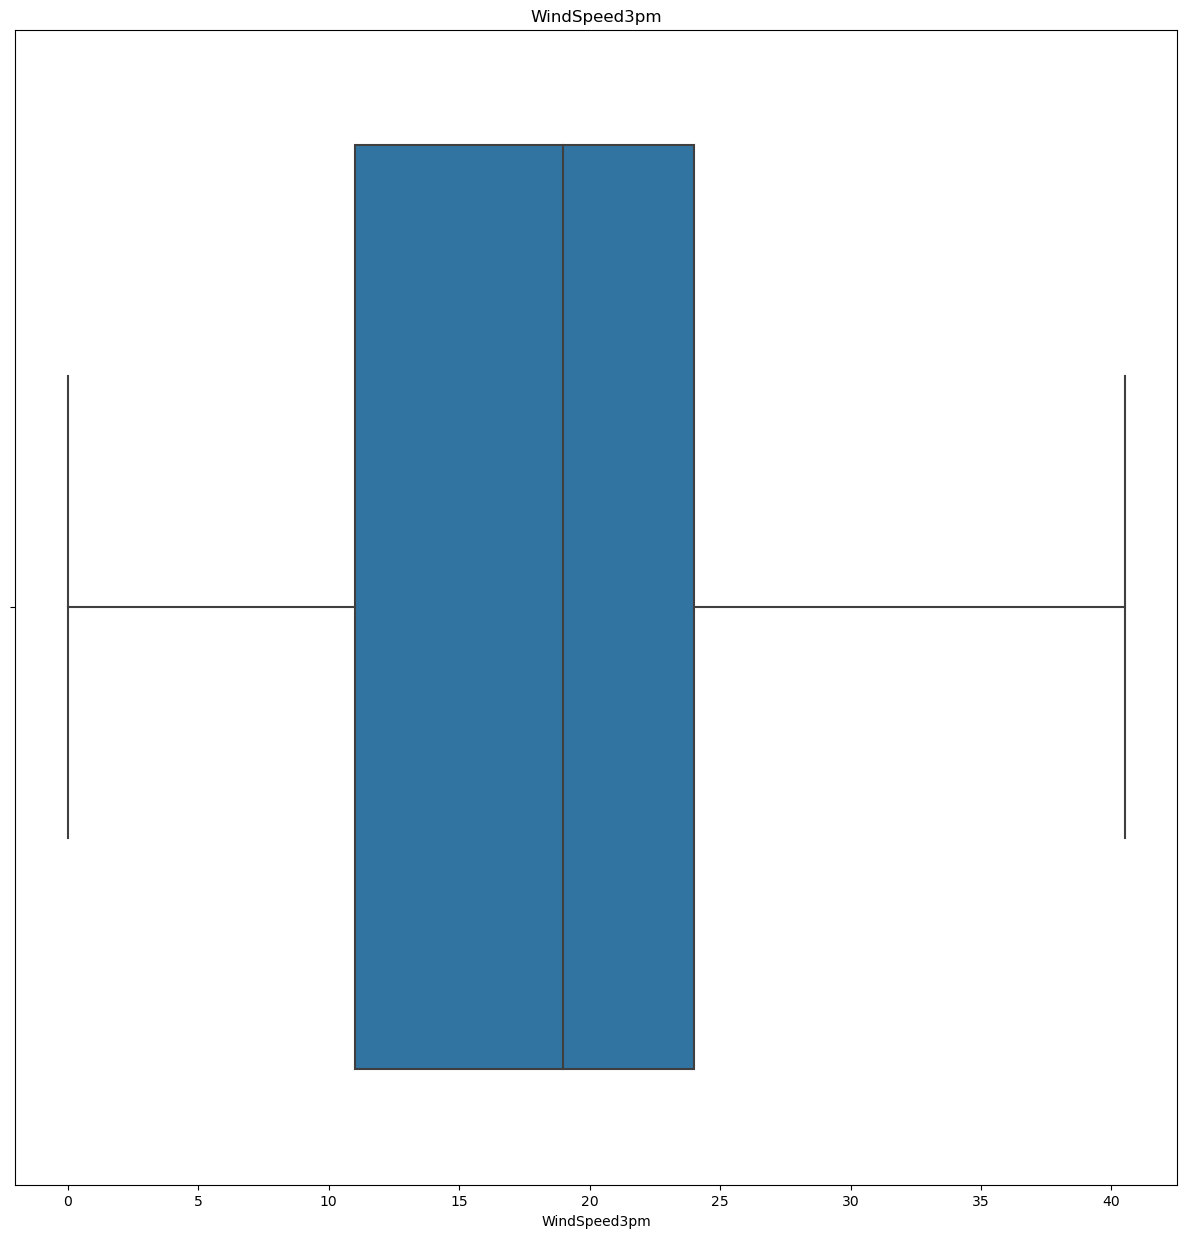

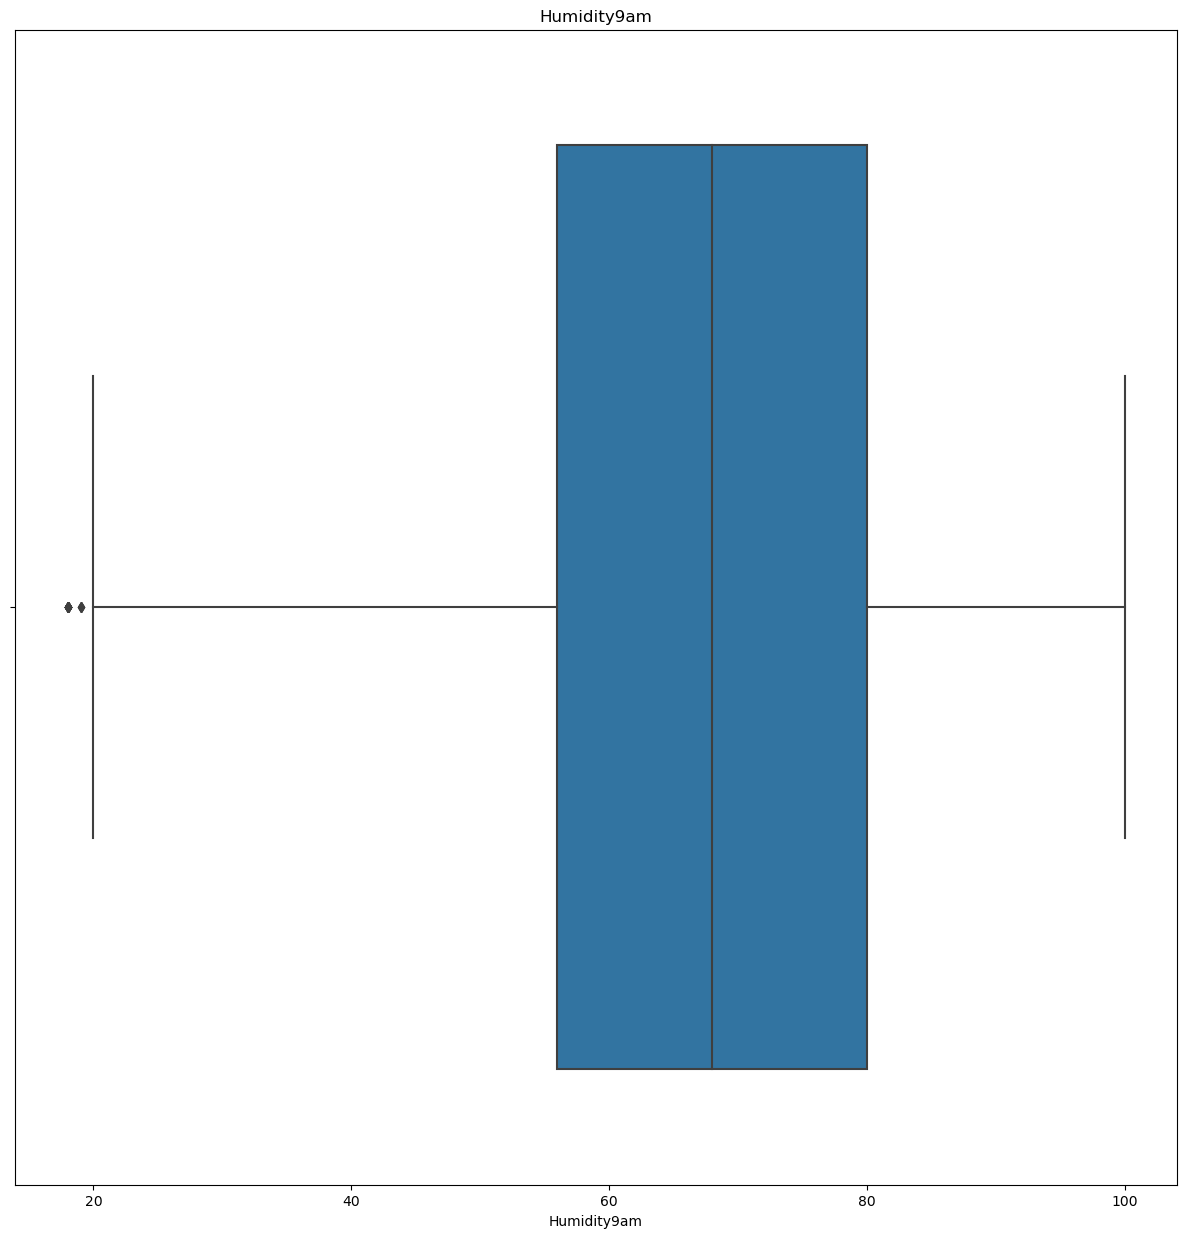

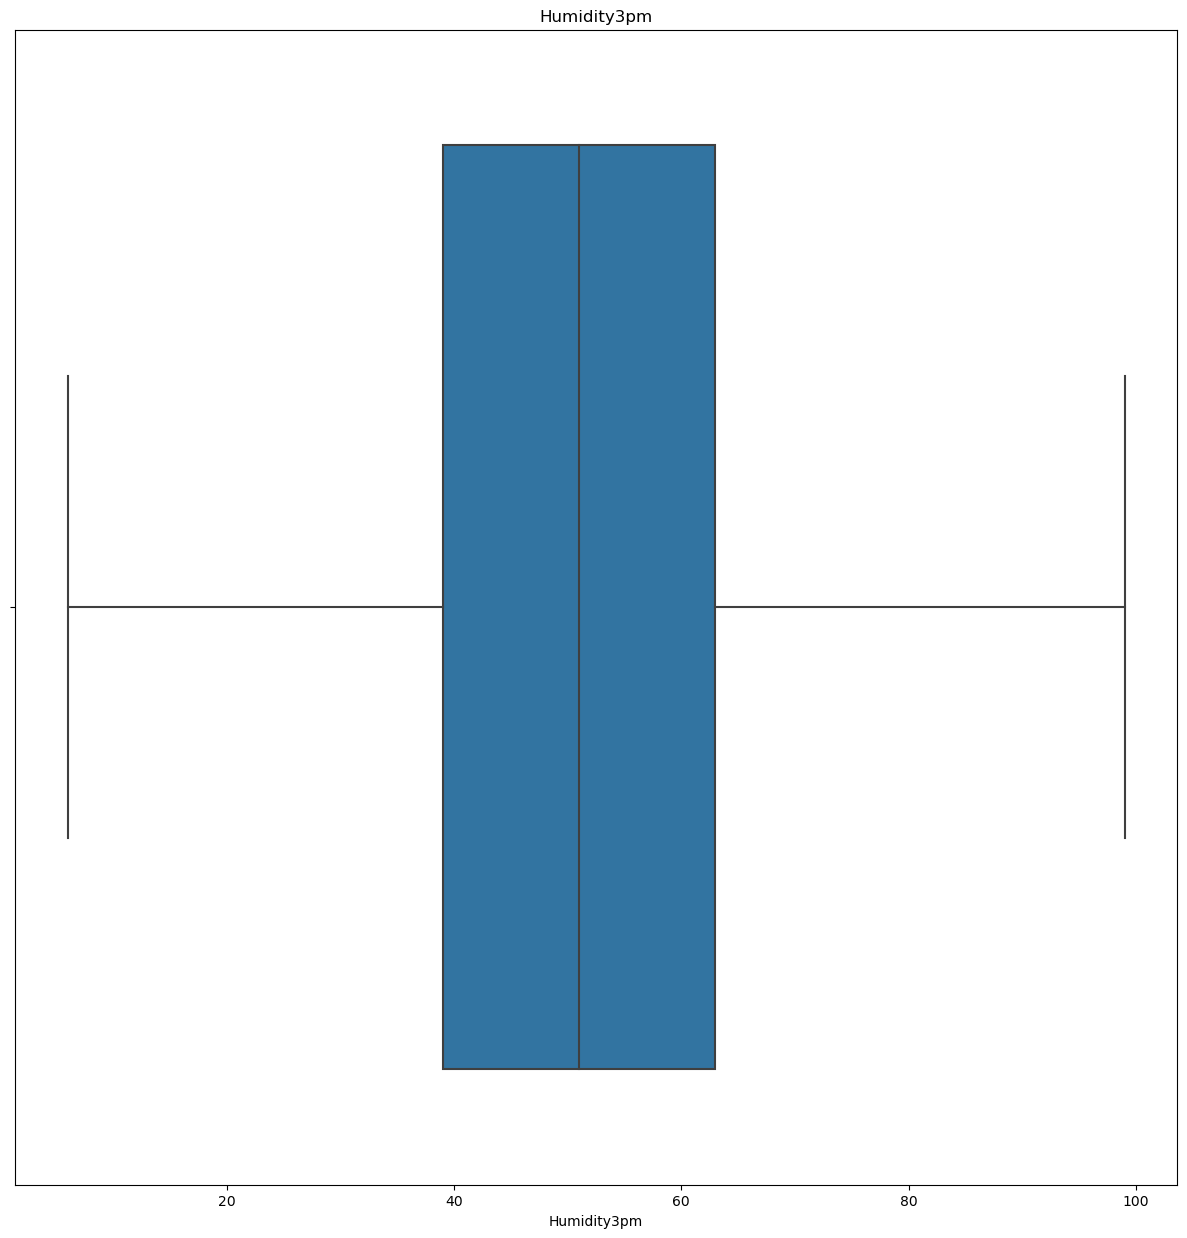

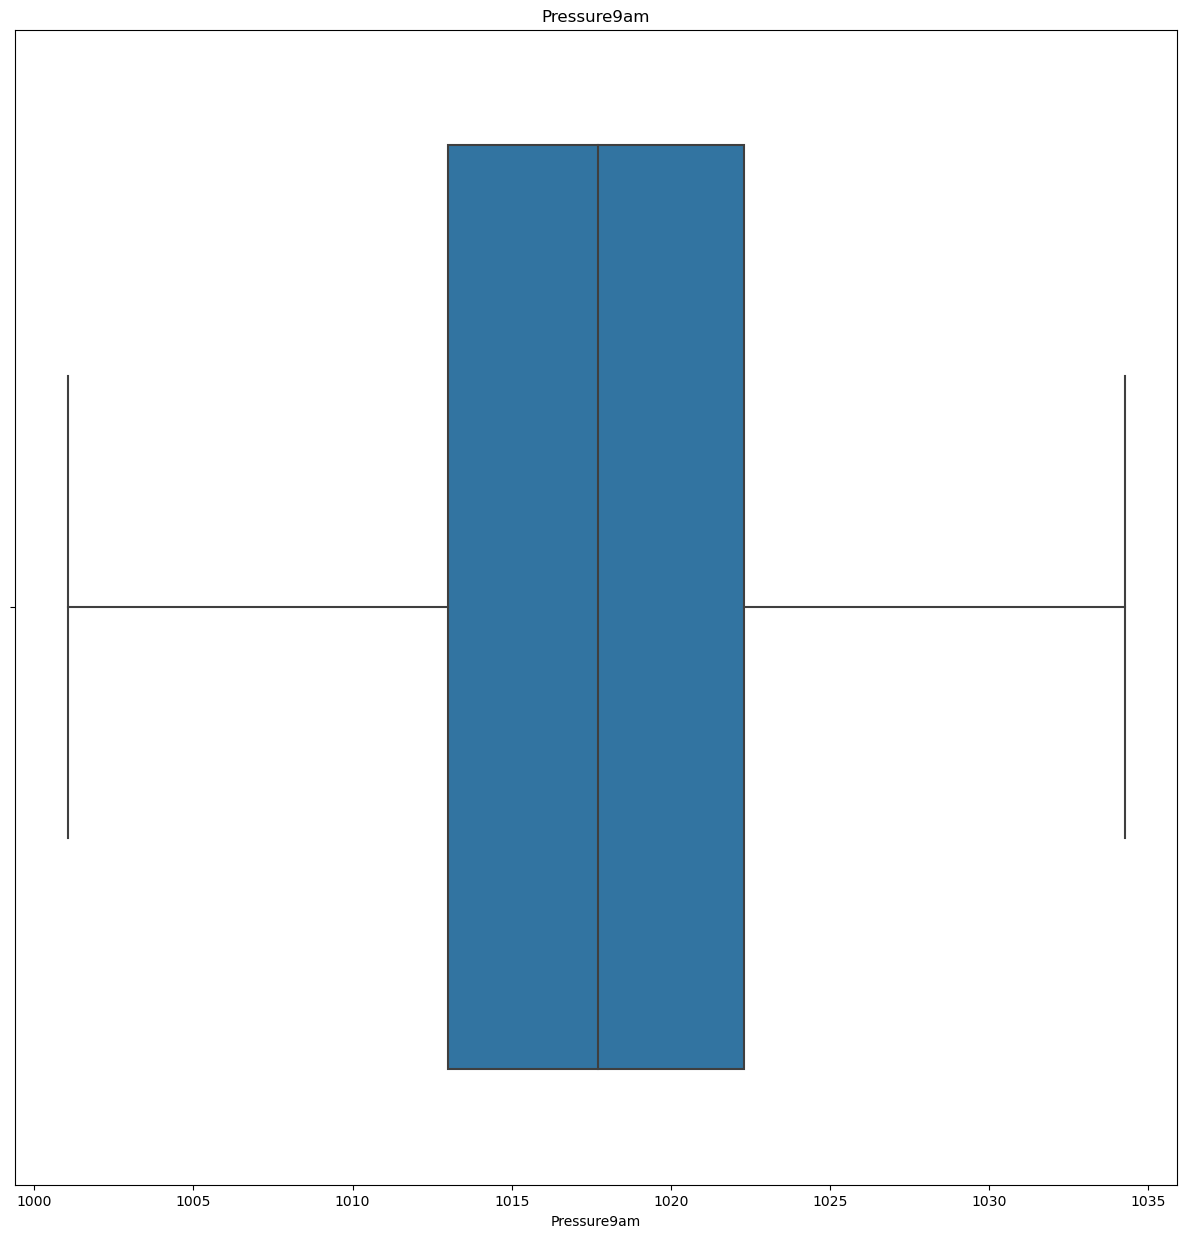

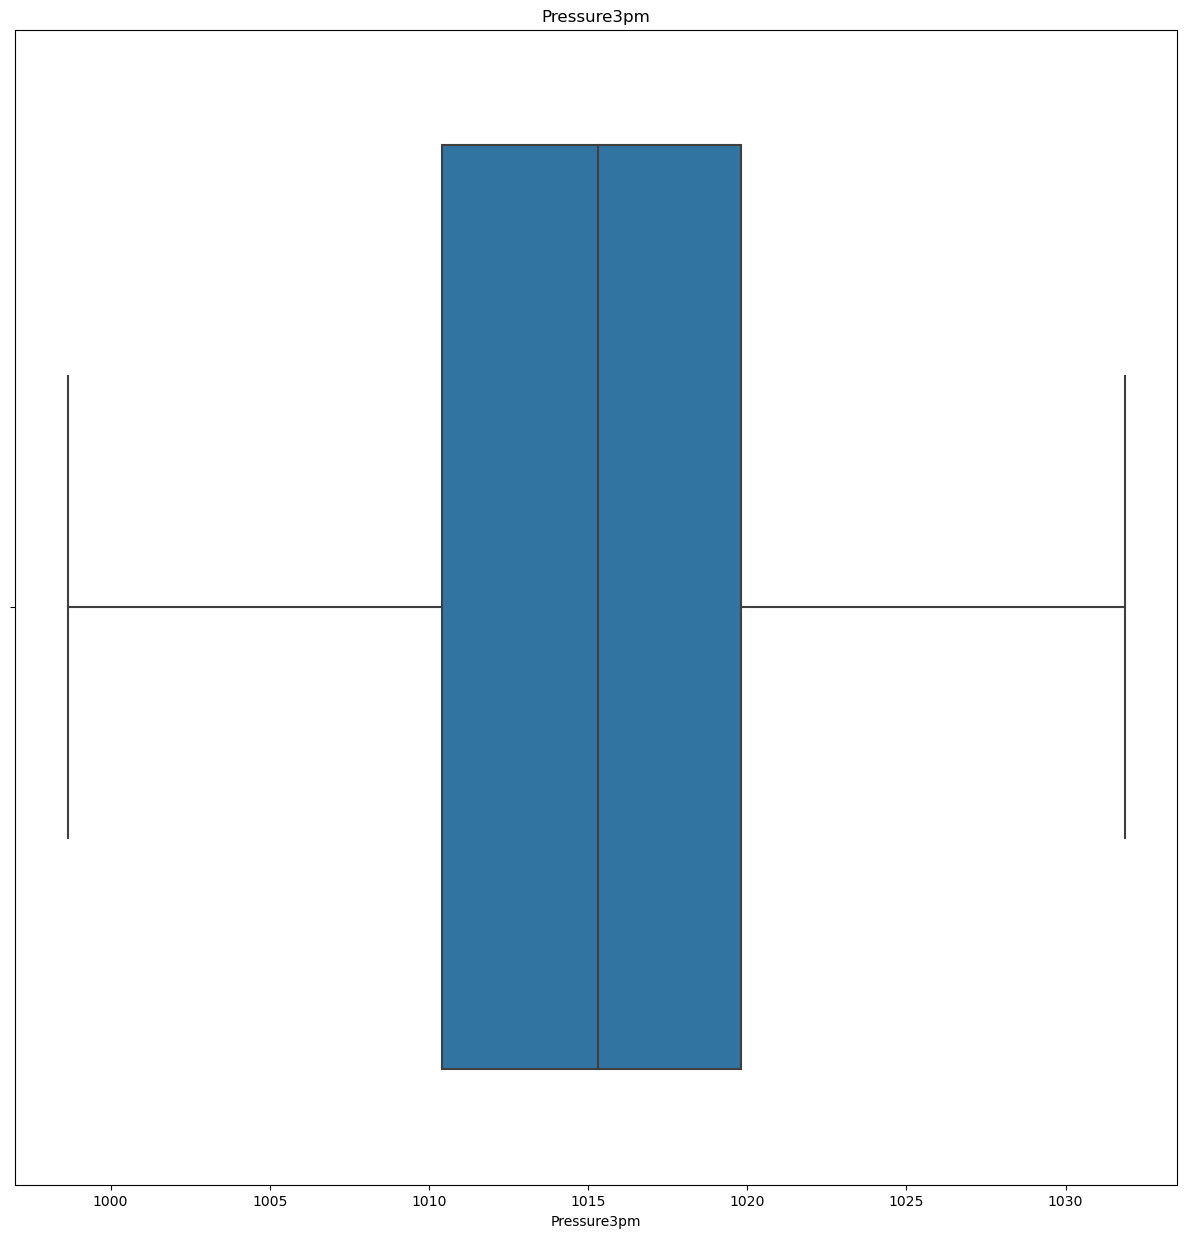

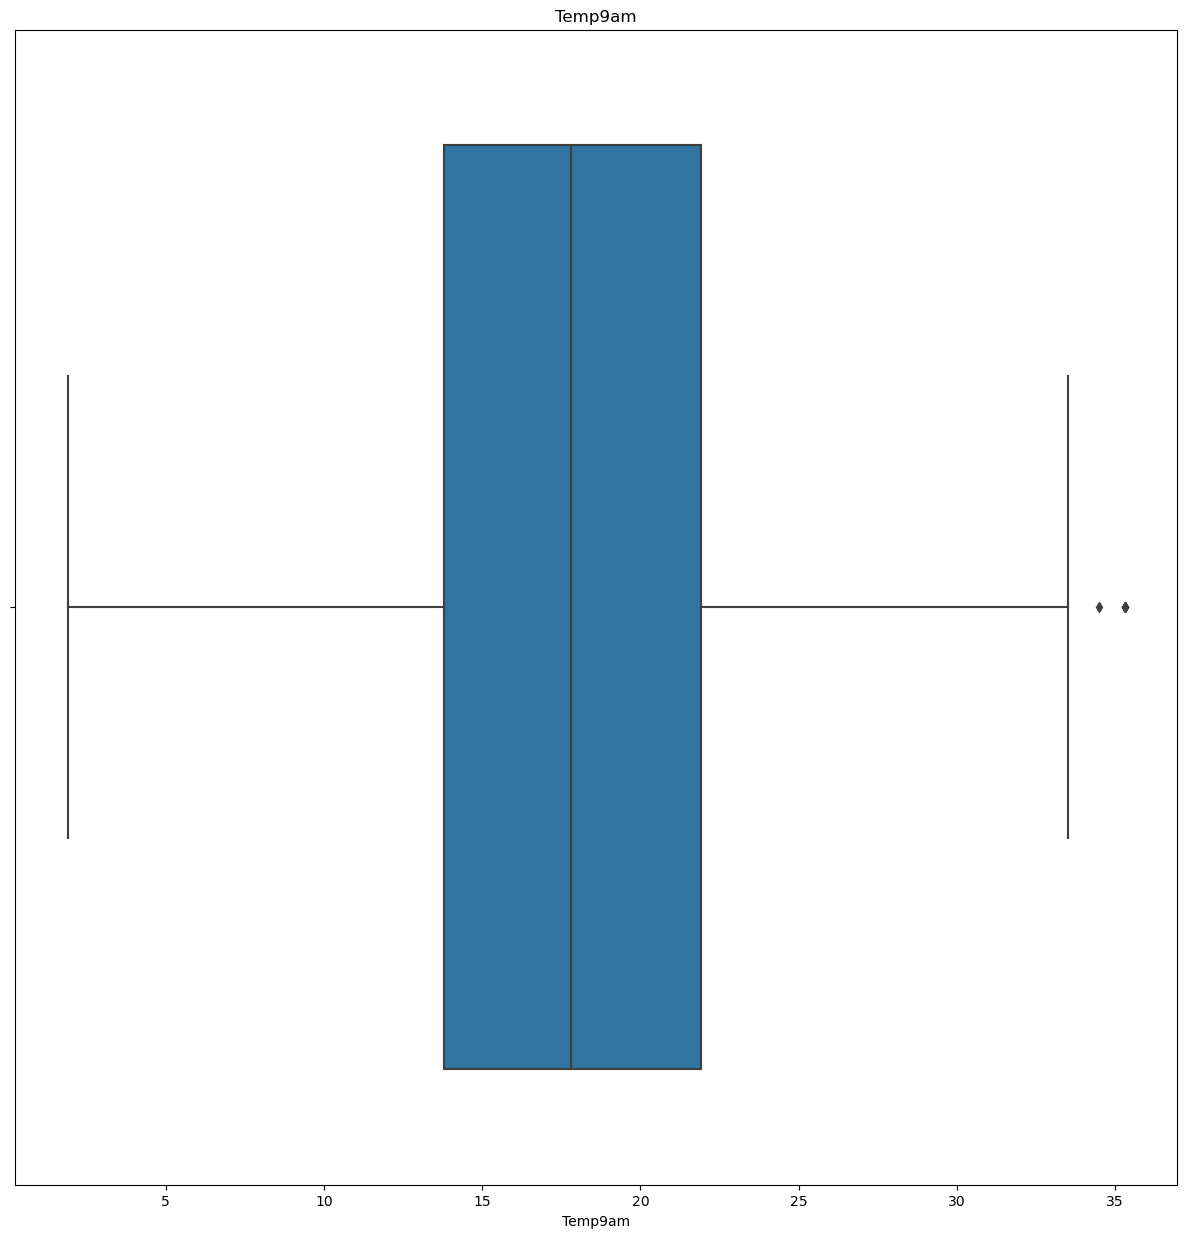

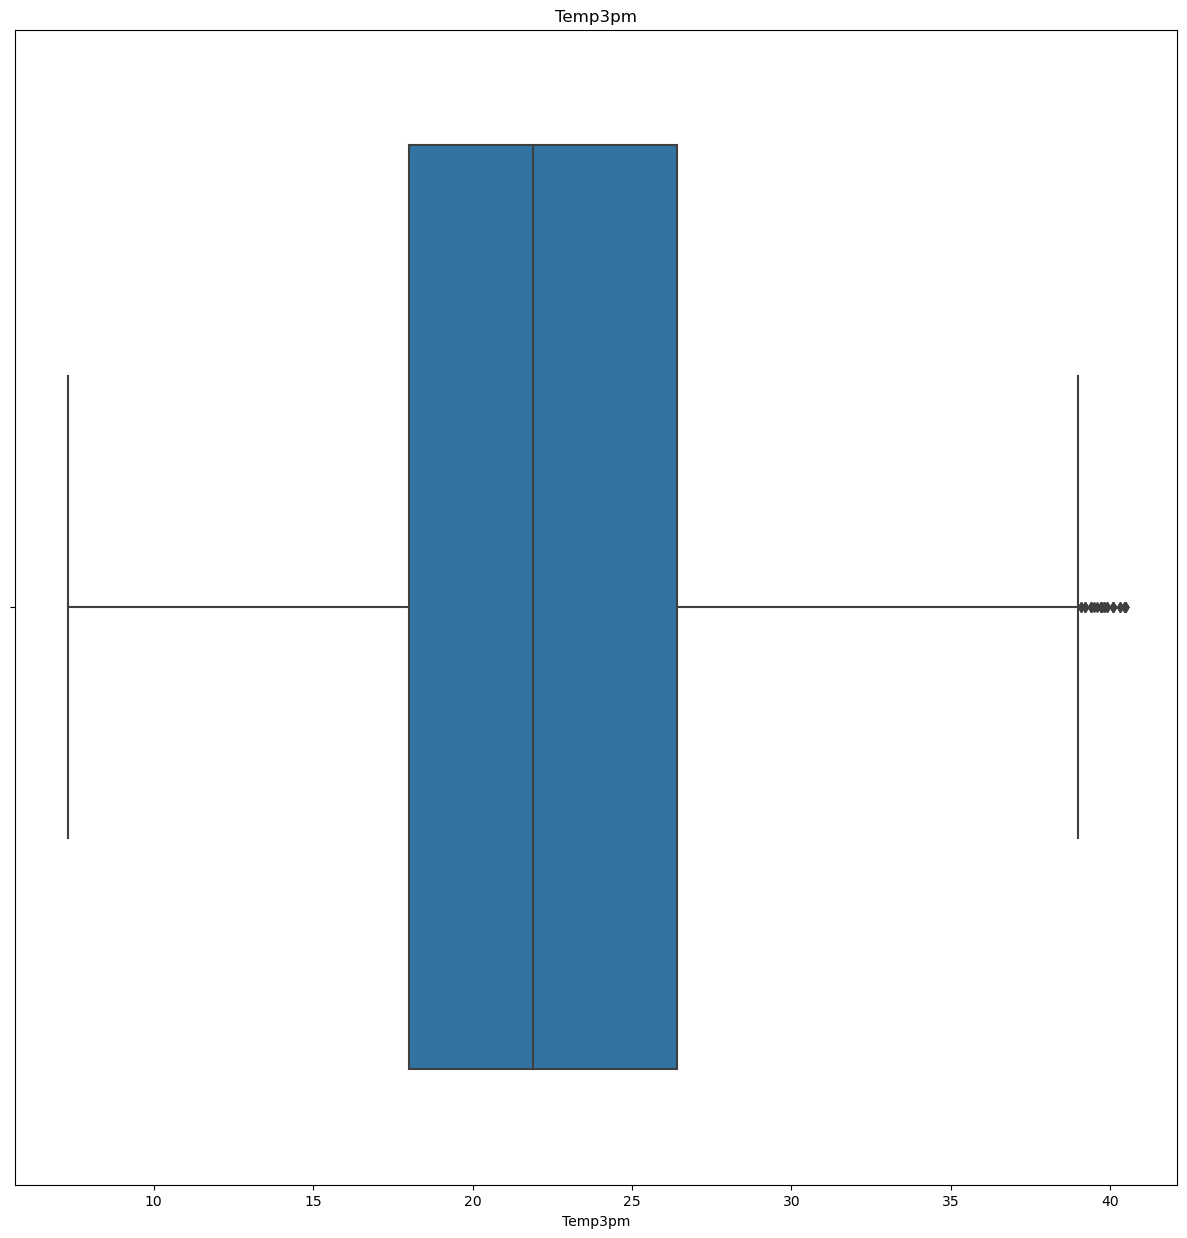

<Figure size 1500x1500 with 0 Axes>

In [61]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [62]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

MinTemp


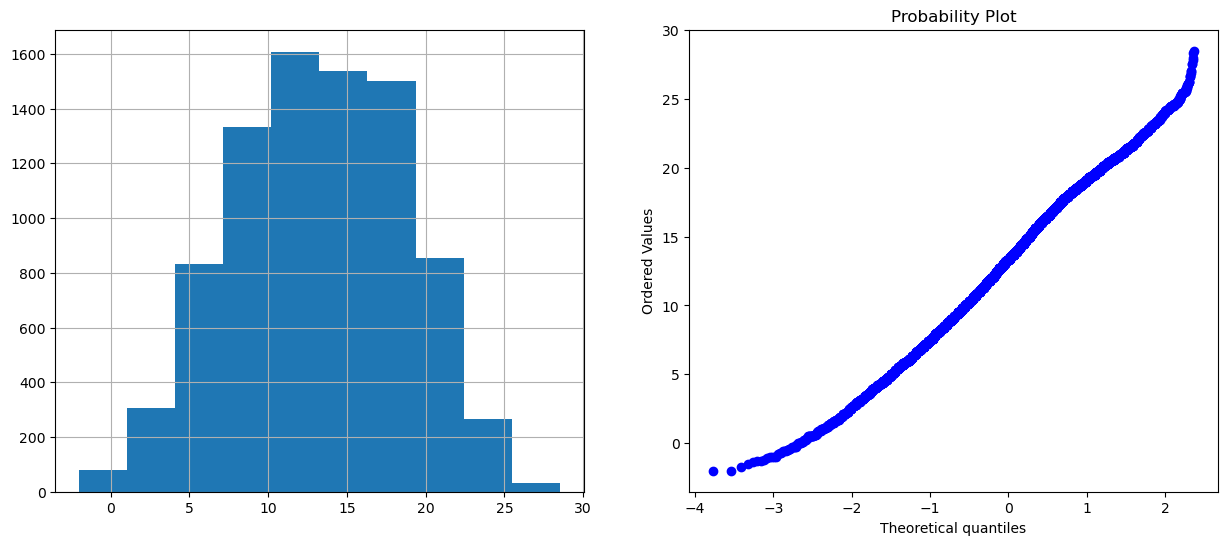

MaxTemp


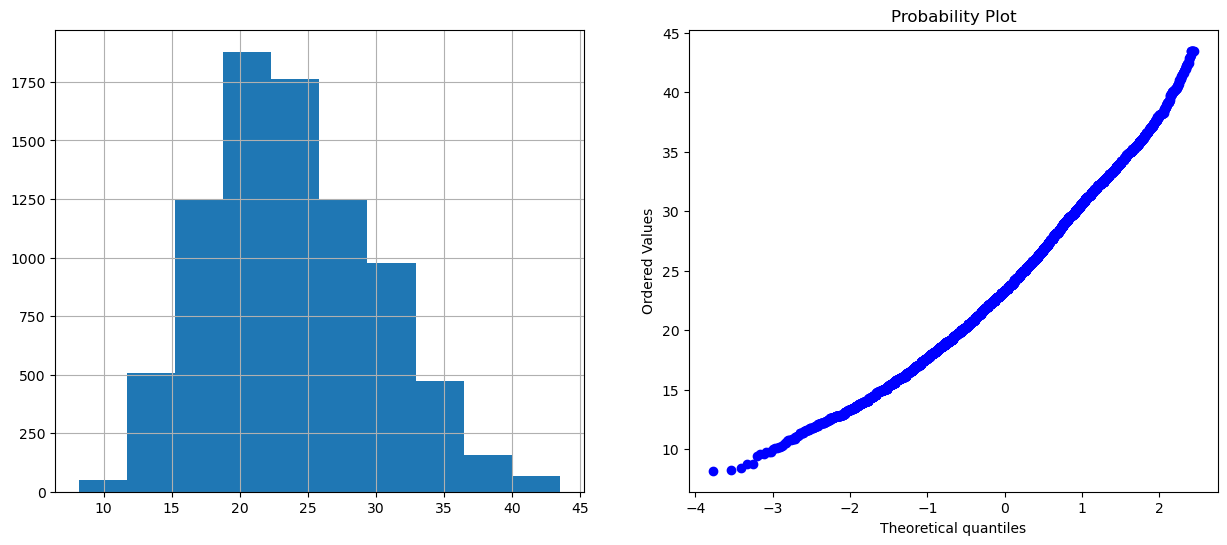

Rainfall


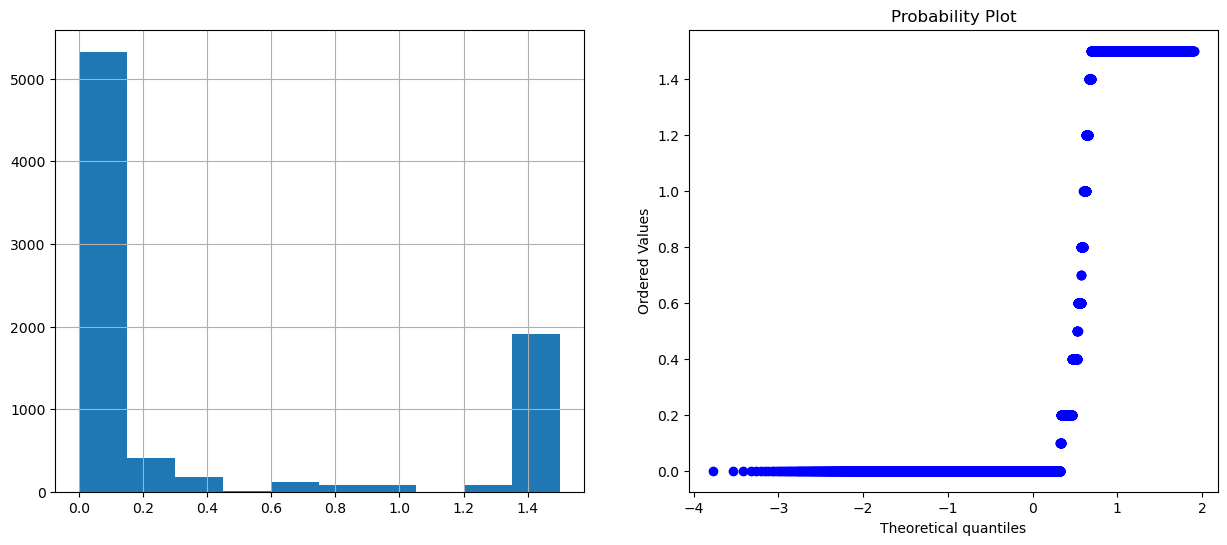

Evaporation


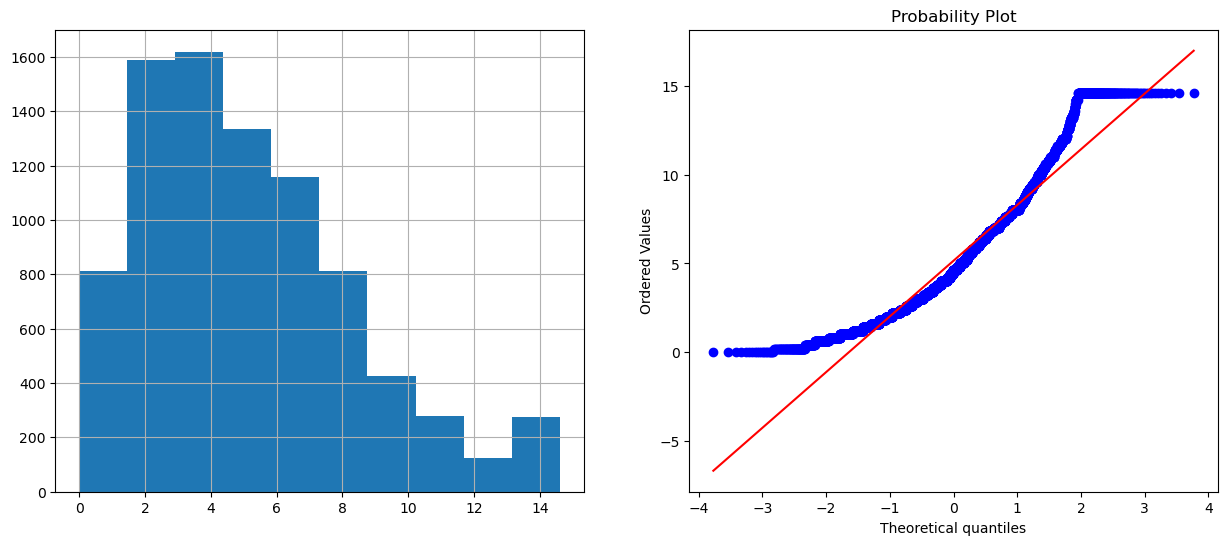

Sunshine


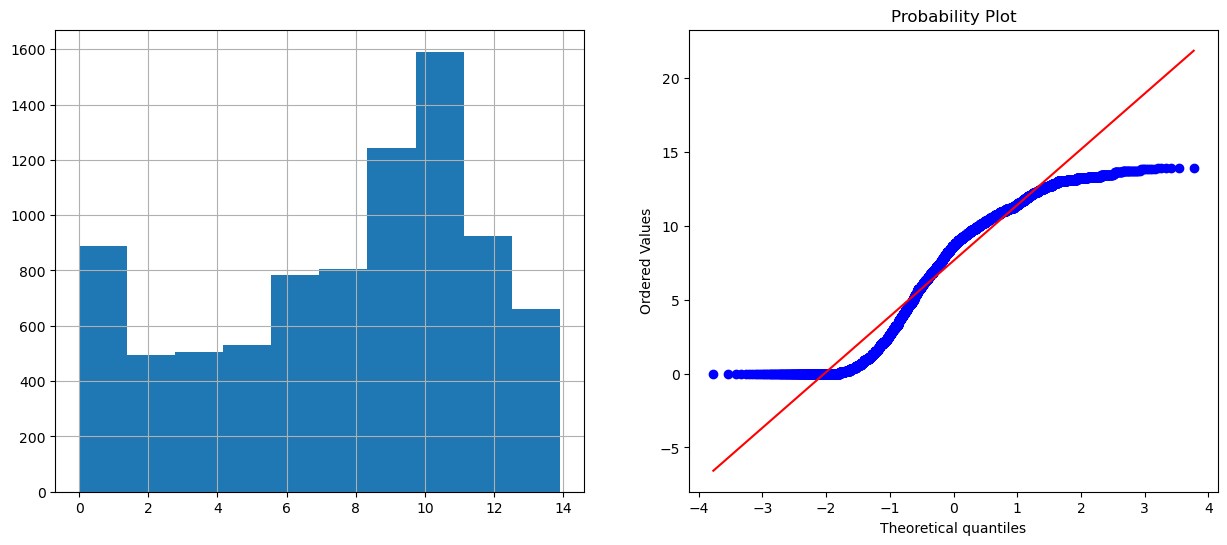

WindGustSpeed


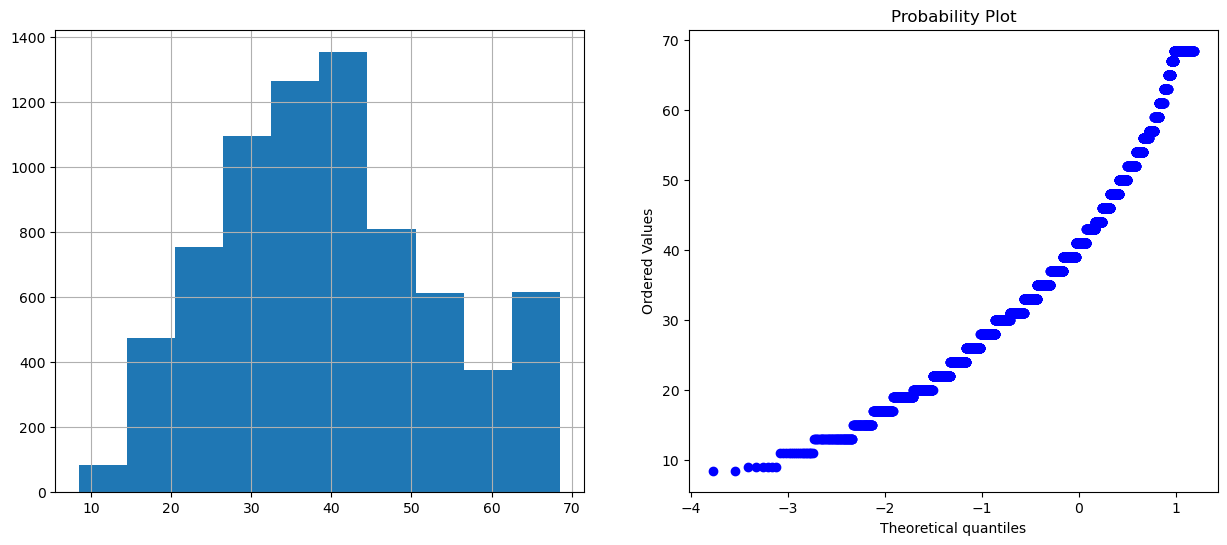

WindSpeed9am


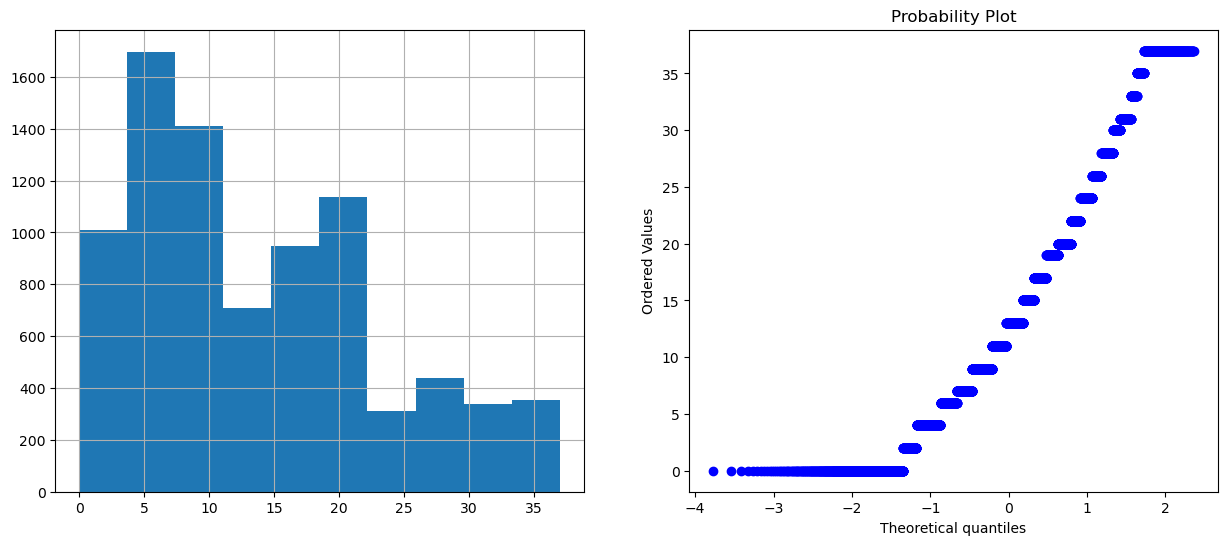

WindSpeed3pm


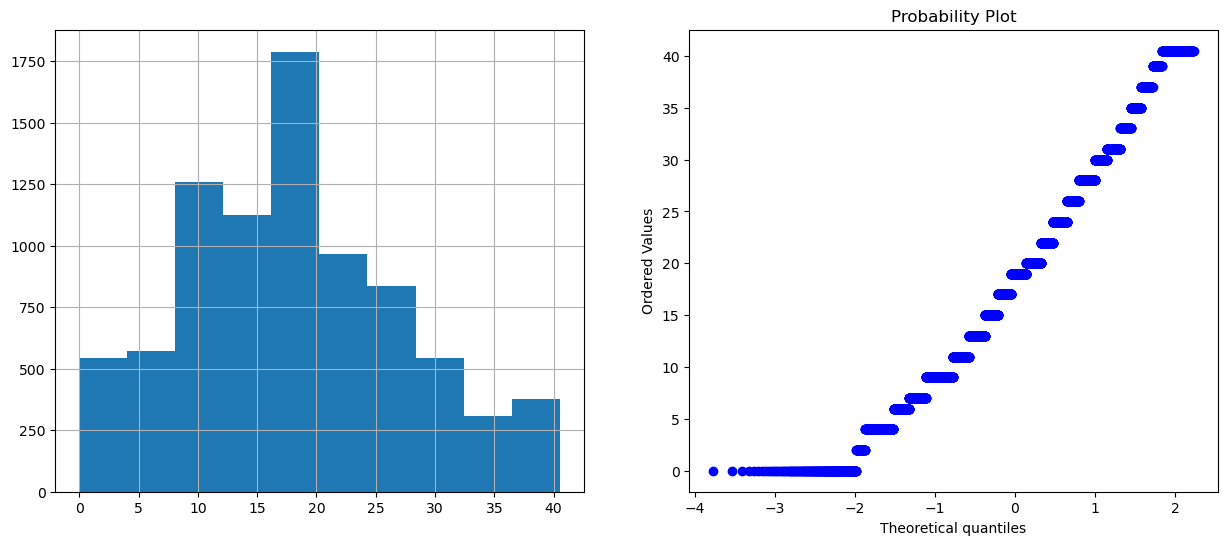

Humidity9am


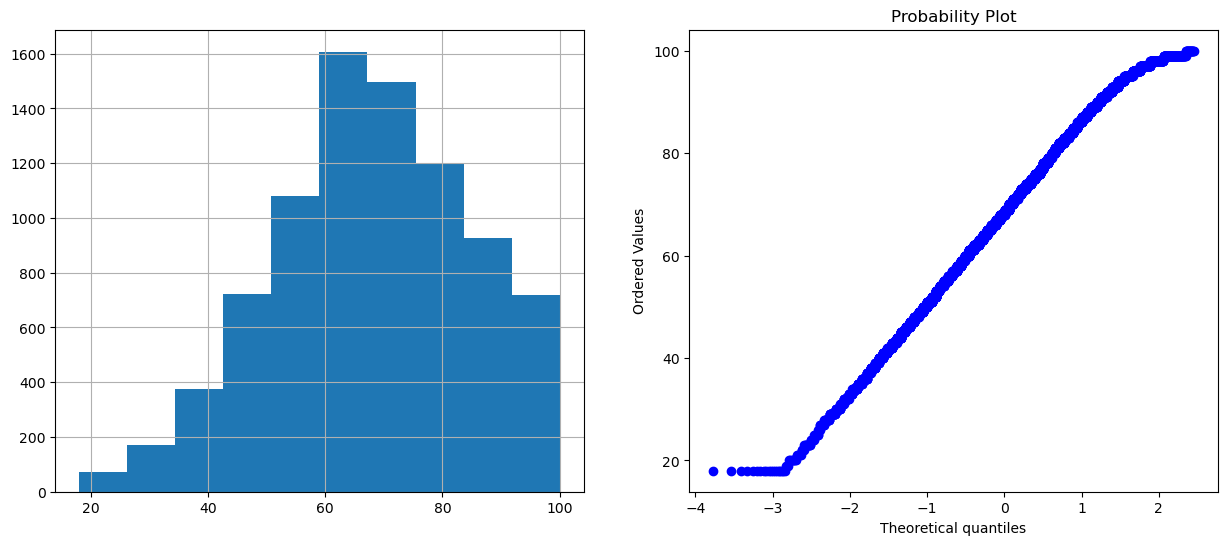

Humidity3pm


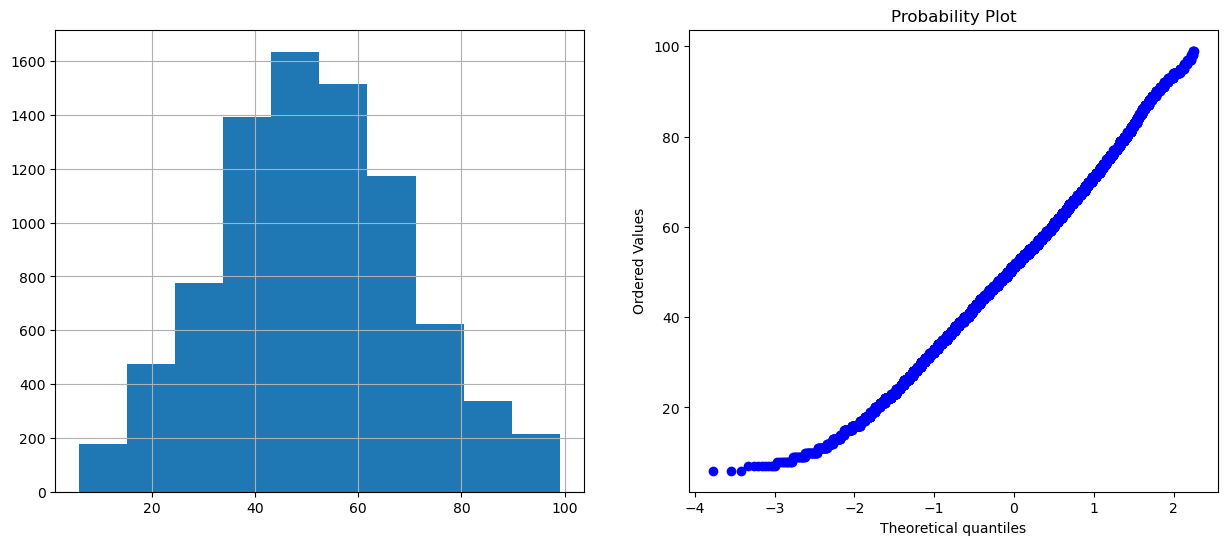

Pressure9am


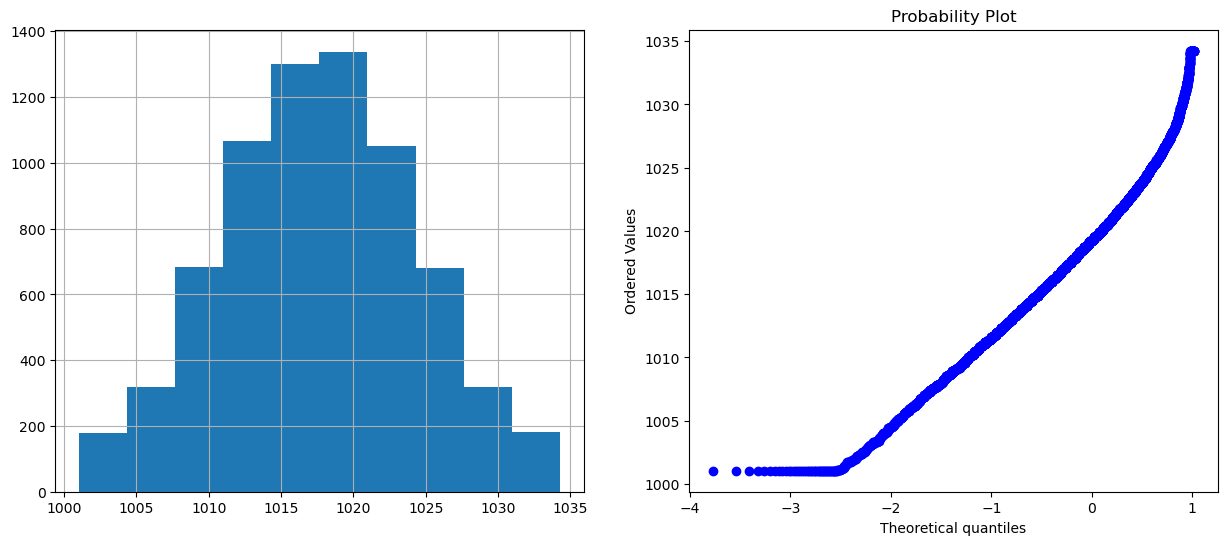

Pressure3pm


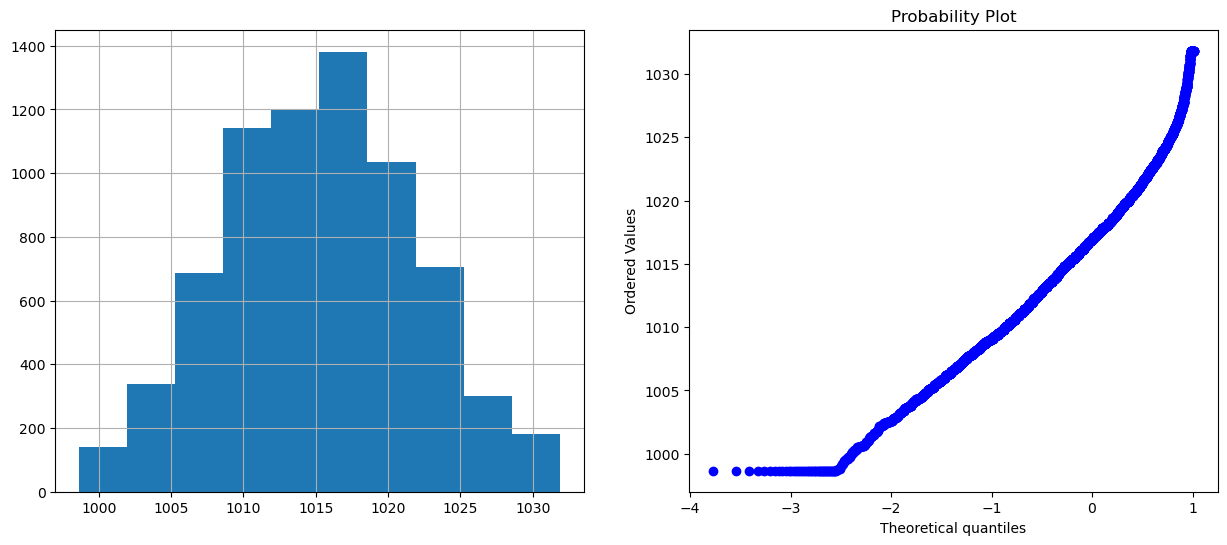

Temp9am


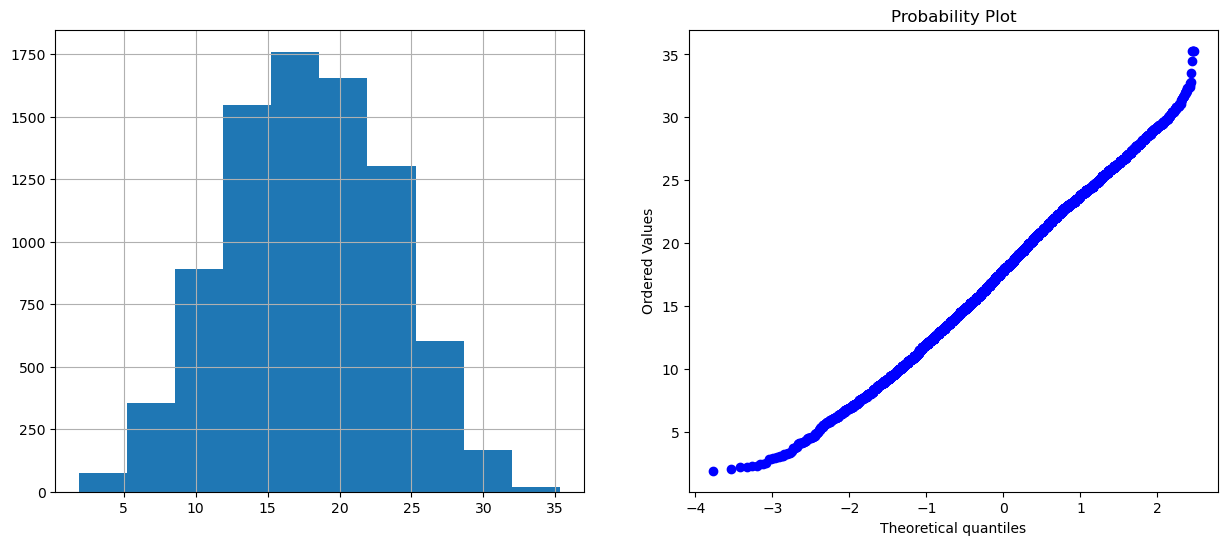

Temp3pm


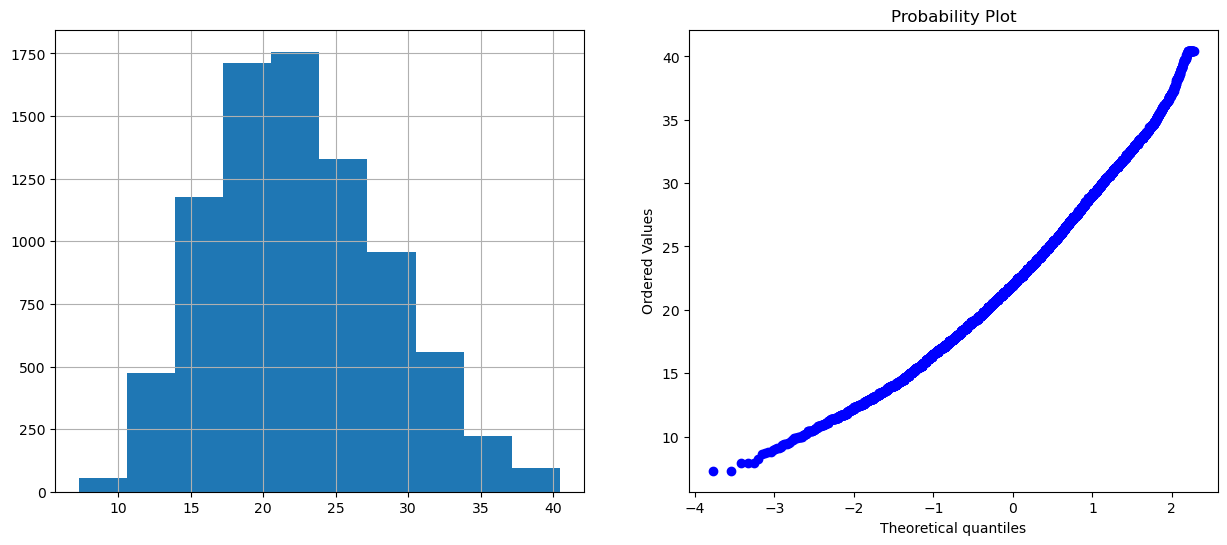

In [67]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [74]:
df.to_csv("preprocessed_1.csv", index=False)

In [75]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = df["RainTomorrow"]

In [85]:
#scaler = RobustScaler()
#X_scaled = scaler.fit_transform(X)

In [79]:
from sklearn.preprocessing import RobustScaler

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [95]:
pip install catboost

  Using cached catboost-1.2.2-cp39-cp39-win_amd64.whl (101.0 MB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

ModuleNotFoundError: No module named 'catboost'

In [87]:
y_train

5490    False
5525    False
95      False
7404    False
6844    False
        ...  
8222    False
8169    False
2784    False
7922    False
4262    False
Name: RainTomorrow, Length: 6740, dtype: bool

In [89]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

ValueError: could not convert string to float: 'No'

In [ ]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

In [ ]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

In [ ]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None) 

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

In [ ]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

In [ ]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None) 

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

In [ ]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

In [ ]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None) 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

In [ ]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

In [ ]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

In [ ]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

In [ ]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred6, average=None)

In [ ]:
svc = SVC()
svc.fit(X_train_res, y_train_res)

In [ ]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

In [ ]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None) 

In [ ]:
joblib.dump(svc, "svc.pkl")
joblib.dump(xgb, "xgb.pkl")